# ADA Milestone 2

Before we begin any visualisation or analysis of data, we need to set up the environment by installing different libraries that will help us afterwards.

## Useful libraries

In [303]:
import pandas as pd
import numpy as np
import ast
import missingno as msno
from geopy.geocoders import Nominatim
import geopandas as gpd
import re
import pycountry_convert as pc
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

## Data importation

- Now that everything is set up, we can import the data. We already created a path on the Github, so we only need to import them.

In [304]:
import dataframes as RAW
import cleaning as CLEAN

- We can now start to visualize all the data that we have and see what information they give us.

In [305]:
RAW.character_data.head()


,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [306]:
RAW.character_data.describe()

,Wiki ID,Actor height,Actor age at release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [307]:
RAW.movie_data.head()

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."


In [308]:
RAW.movie_data.describe()

,Wiki ID,Release date,Revenue,Runtime
count,3.937200e+04,39372,6.793000e+03,32669.000000
mean,1.663258e+07,1978-01-24 00:35:35.202682112,5.673971e+07,95.248277
min,3.217000e+03,1892-10-28 00:00:00,1.000000e+04,0.100000
25%,5.872940e+06,1952-07-04 00:00:00,3.000000e+06,83.000000
50%,1.602267e+07,1989-01-24 00:00:00,1.486709e+07,95.000000
75%,2.625549e+07,2005-07-18 06:00:00,5.297001e+07,108.000000
max,3.747359e+07,2016-06-08 00:00:00,2.782275e+09,5700.000000
std,1.126984e+07,NaN,1.222691e+08,64.337785


- From the scraping we have performed, we were able to collect about 5,000 movie revenues that were previously not inside of the dataframe, as well as movie ratings and awards. We ended up with the following dataframe:

In [309]:
RAW.movie_data_scraped.head()

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,NaN,2.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.0,NaN,NaN
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",5.9,NaN,NaN
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",6.9,1.0,6.0
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",5.8,NaN,NaN


In [310]:
RAW.movie_data_scraped.describe()

,Wiki ID,Revenue,Runtime,IMDb rating,Wins,Nominations
count,3.937200e+04,1.089000e+04,32669.000000,32112.000000,11472.000000,16528.000000
mean,1.663258e+07,4.149214e+07,95.248277,6.270569,6.645833,8.175762
std,1.126984e+07,9.997087e+07,64.337785,1.119103,14.732923,20.428238
min,3.217000e+03,7.400000e+01,0.100000,1.000000,1.000000,1.000000
25%,5.872940e+06,7.498058e+05,83.000000,5.600000,1.000000,1.000000
50%,1.602267e+07,6.983492e+06,95.000000,6.400000,2.000000,3.000000
75%,2.625549e+07,3.473780e+07,108.000000,7.000000,6.000000,7.000000
max,3.747359e+07,2.782275e+09,5700.000000,10.000000,389.000000,634.000000


In [311]:
RAW.character_names.head()

,Character name,Freebase ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [312]:
RAW.character_names.describe()

,Character name,Freebase ID
count,2666,2666
unique,970,2661
top,Daffy Duck,/m/0gcy23_
freq,42,2


In [313]:
RAW.tvtropes.head()

,Character type,Character name,Movie,Freebase ID,Actor name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [314]:
RAW.tvtropes.describe()

,Character type,Character name,Movie,Freebase ID,Actor name
count,501,501,501,501,501
unique,72,434,383,447,350
top,crazy_jealous_guy,Captain Jack Sparrow,Pirates of the Caribbean: Dead Man's Chest,/m/0k1xxm,Robert De Niro
freq,25,5,7,5,9


In [315]:
RAW.summaries.head()

,Wiki ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [316]:
RAW.summaries.describe()

,Wiki ID
count,4.230300e+04
mean,1.497051e+07
std,1.111994e+07
min,3.300000e+02
25%,4.565802e+06
50%,1.284591e+07
75%,2.485168e+07
max,3.750192e+07


## Data cleaning

By using the MSNO library, we are able to visualise the amount of missing data inside of our dataframes. For example, displayed below is the amount of missing data (represented by the white stripes) in every column of the dataframes: 

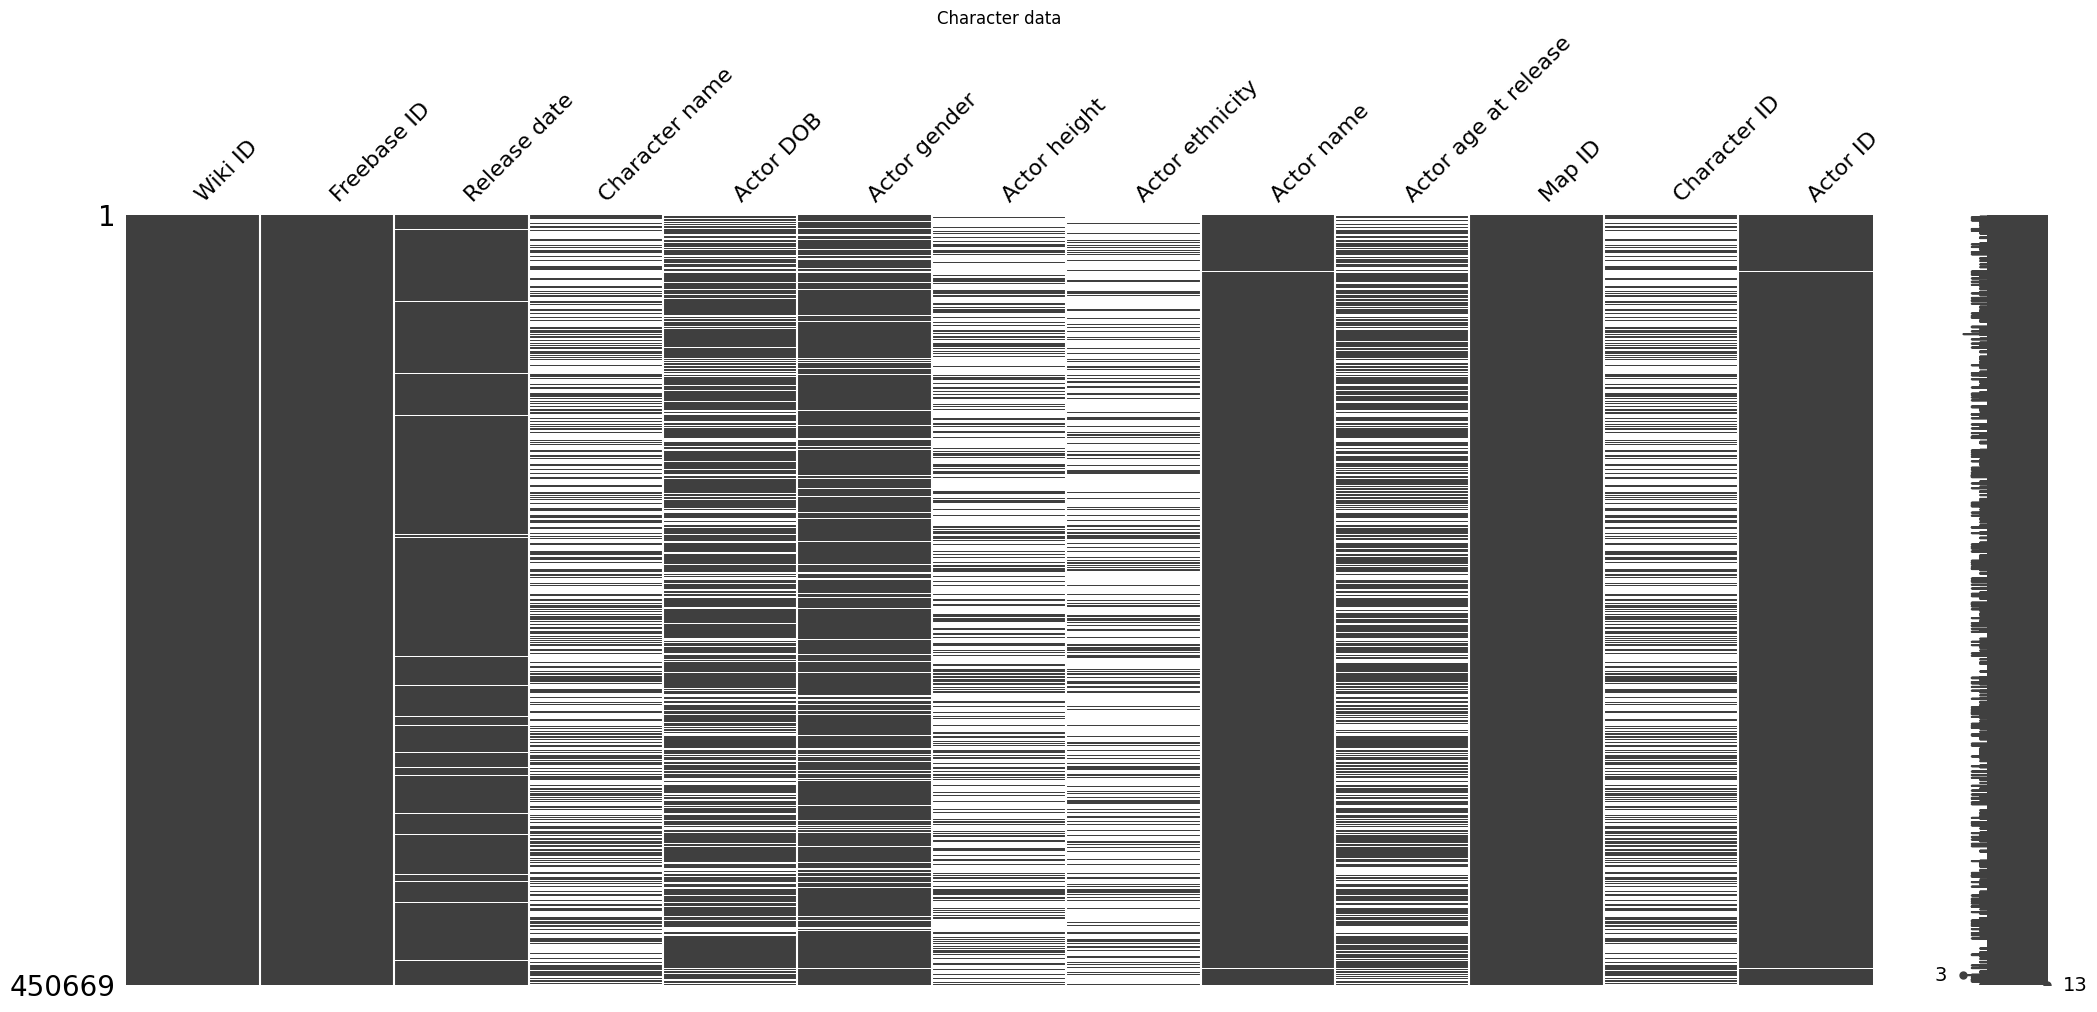

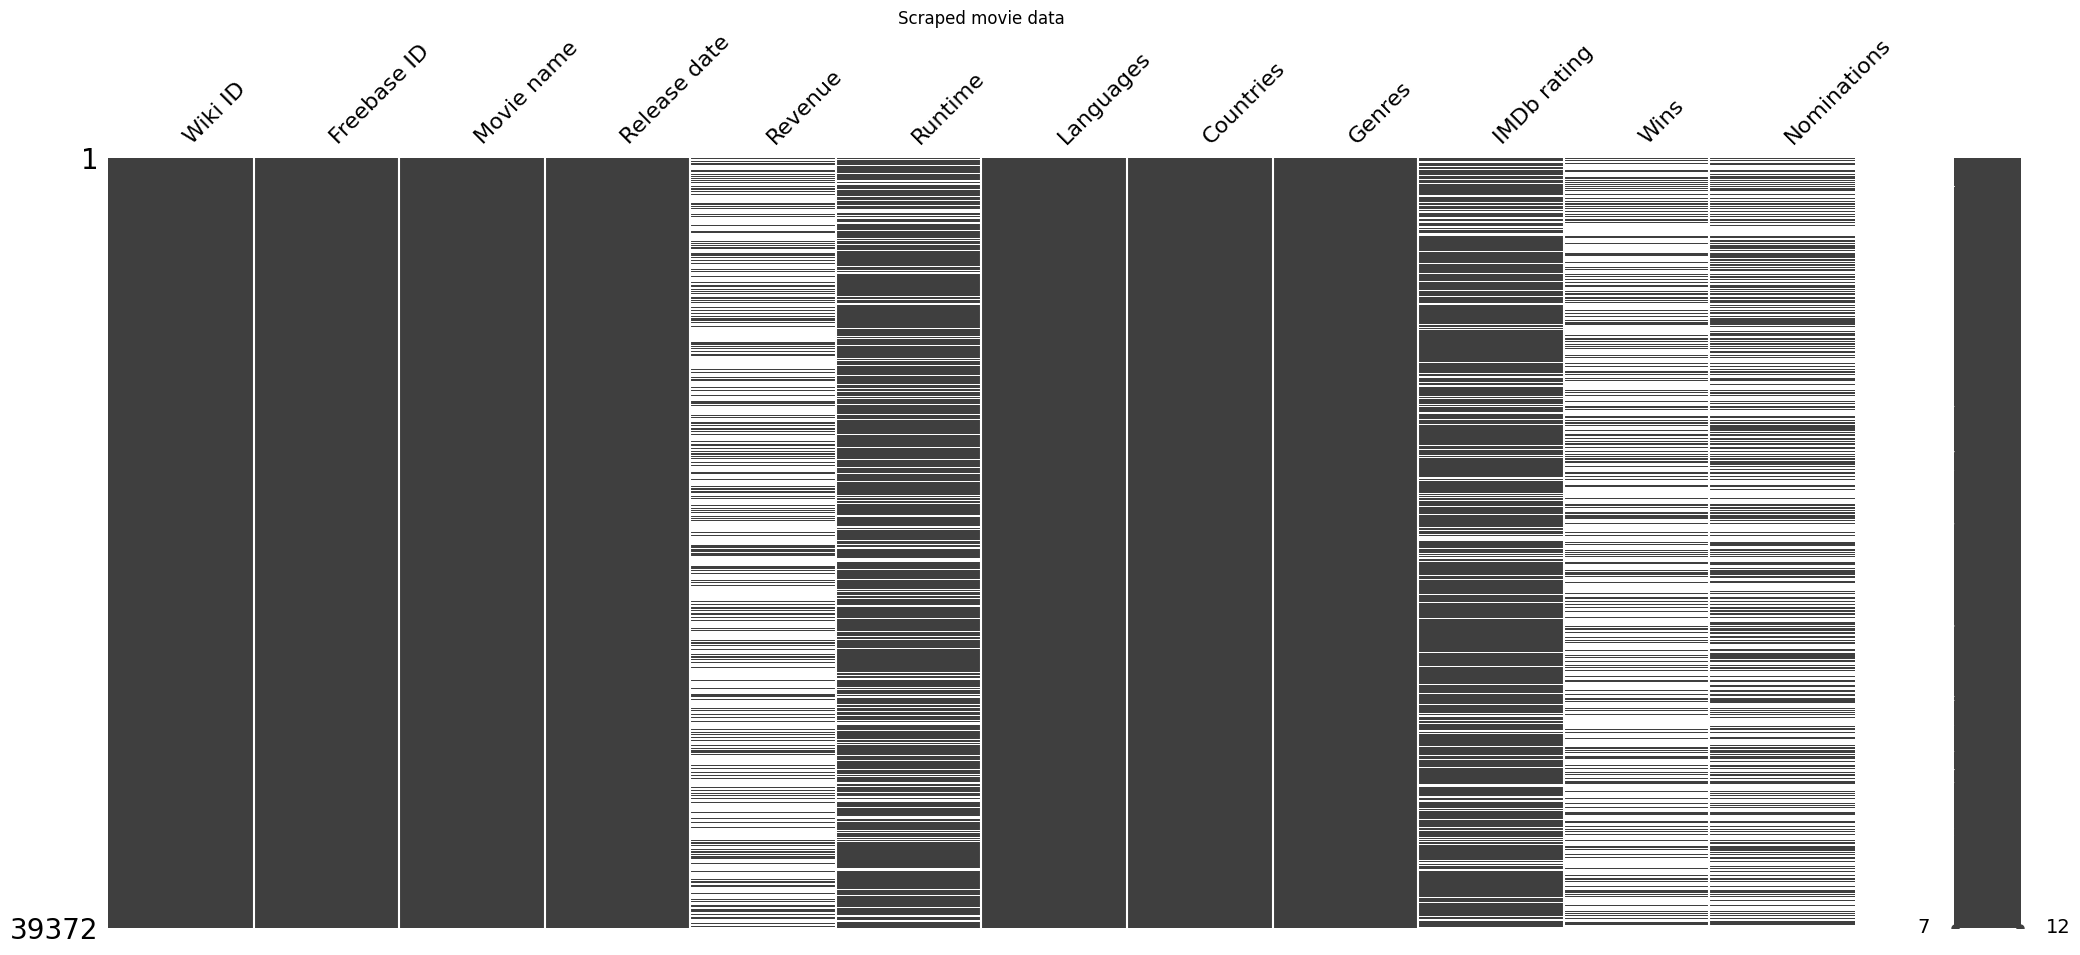

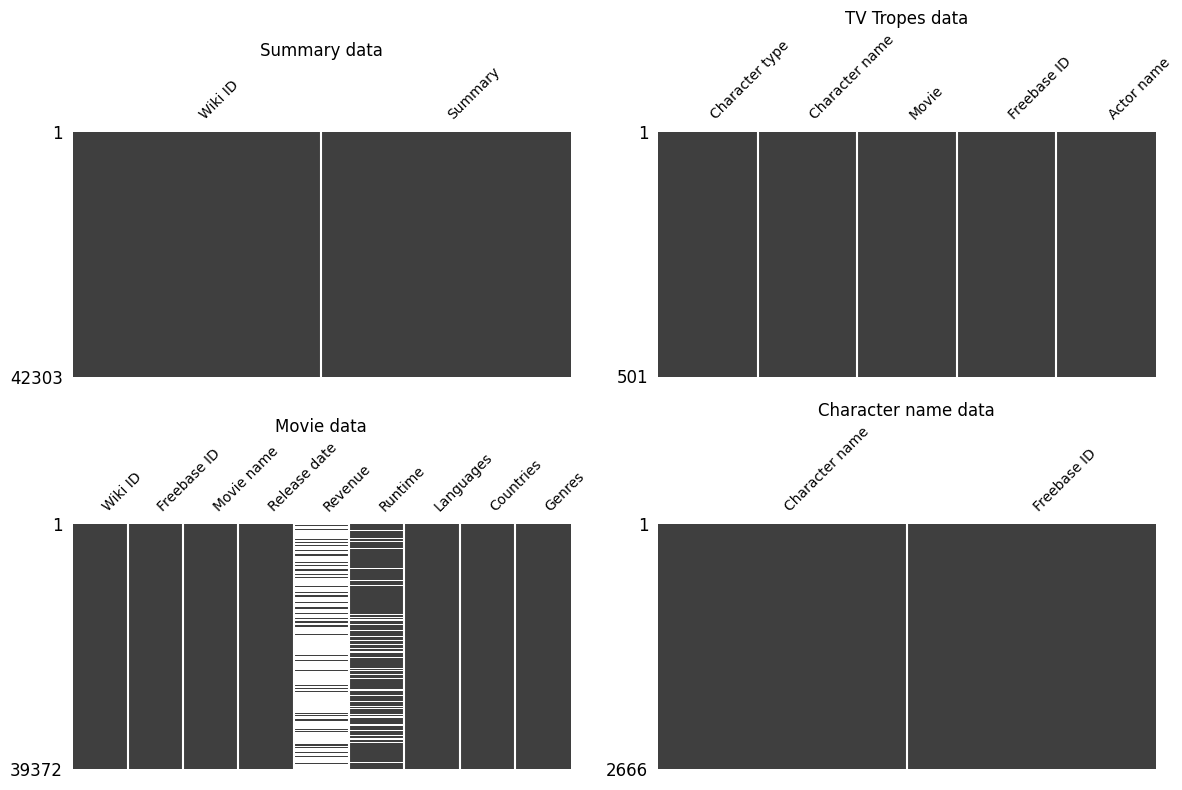

In [317]:
msno.matrix(RAW.character_data)
plt.title("Character data")
msno.matrix(RAW.movie_data_scraped)
plt.title("Scraped movie data")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot missingno matrices for each DataFrame and add titles
msno.matrix(RAW.summaries, ax=axes[0, 0], sparkline=False, fontsize=10)
axes[0, 0].set_title('Summary data')

msno.matrix(RAW.tvtropes, ax=axes[0, 1], sparkline=False, fontsize=10)
axes[0, 1].set_title('TV Tropes data')

msno.matrix(RAW.movie_data, ax=axes[1, 0], sparkline=False, fontsize=10)
axes[1, 0].set_title('Movie data')

msno.matrix(RAW.character_names, ax=axes[1, 1], sparkline=False, fontsize=10)
axes[1, 1].set_title('Character name data')

plt.tight_layout()

For summary, TV tropes and character name data, we have no missing values. For the remaining data, we will plot the percentage of missing data:

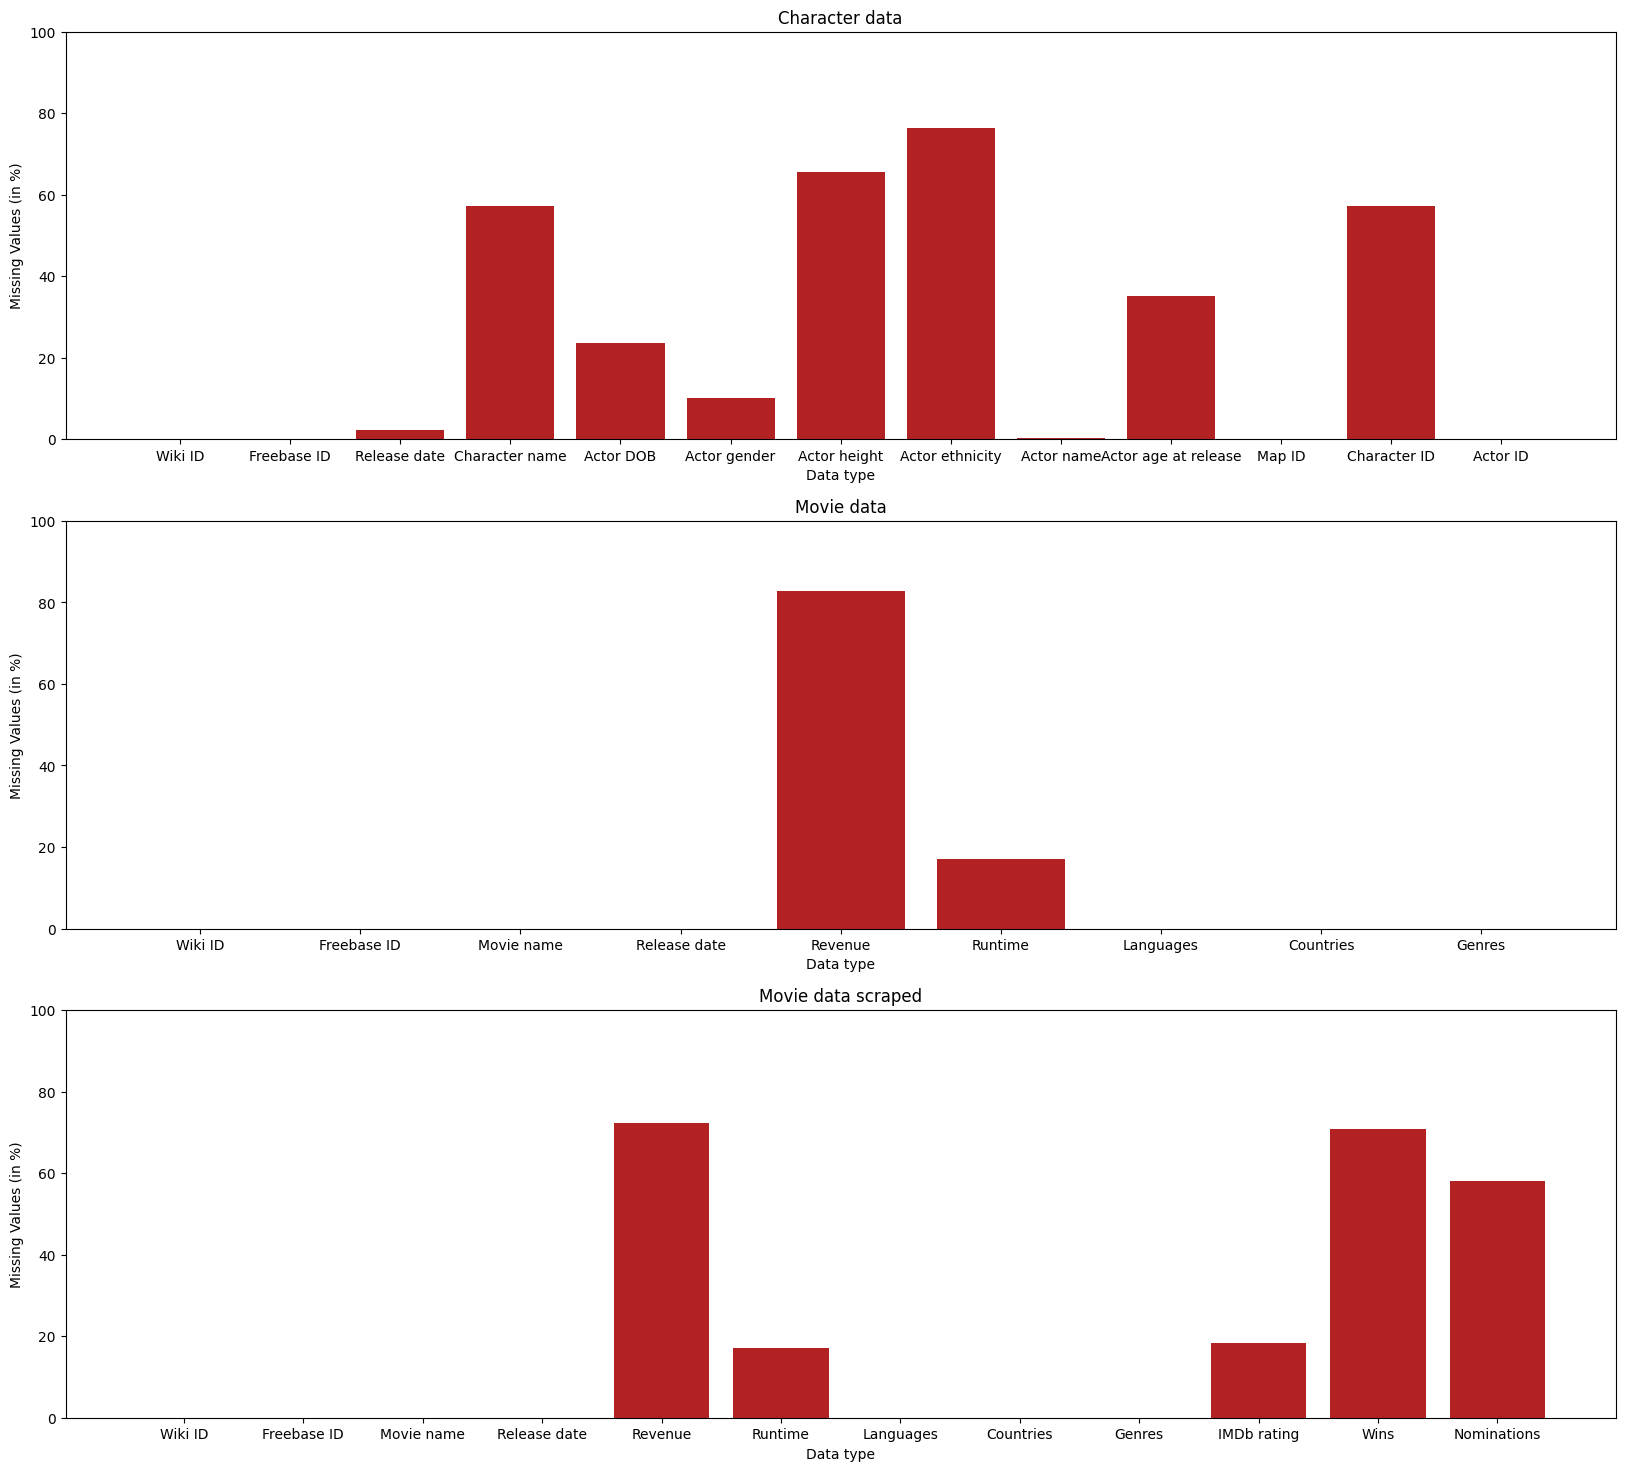

In [318]:
missing_percentage_character_data = (RAW.character_data.isnull().sum() / len (RAW.character_data)) * 100
missing_percentage_movie_data = (RAW.movie_data.isnull().sum() / len (RAW.movie_data)) * 100
missing_percentage_movie_data_scraped = (RAW.movie_data_scraped.isnull().sum() / len (RAW.movie_data_scraped)) * 100
missing_percentage_character_names = (RAW.character_names.isnull().sum() / len (RAW.character_names)) * 100
missing_percentage_tvtropes = (RAW.tvtropes.isnull().sum() / len (RAW.tvtropes)) * 100
missing_percentage_summaries = (RAW.summaries.isnull().sum() / len (RAW.summaries)) * 100

fig, axs = plt.subplots(3, 1, figsize=(20, 18))

# Subplot 1
axs[0].bar(missing_percentage_character_data.index, missing_percentage_character_data.values, color='firebrick')
axs[0].set_title('Character data')
axs[0].set_xlabel('Data type')
axs[0].set_ylabel('Missing Values (in %)')
axs[0].set_ylim(0,100)

# Subplot 2
axs[1].bar(missing_percentage_movie_data.index, missing_percentage_movie_data.values, color='firebrick')
axs[1].set_title('Movie data')
axs[1].set_xlabel('Data type')
axs[1].set_ylabel('Missing Values (in %)')
axs[1].set_ylim(0,100)

# Subplot 3
axs[2].bar(missing_percentage_movie_data_scraped.index, missing_percentage_movie_data_scraped.values, color='firebrick')
axs[2].set_title('Movie data scraped')
axs[2].set_xlabel('Data type')
axs[2].set_ylabel('Missing Values (in %)')
axs[2].set_ylim(0,100)

plt.ylim(0,100)
plt.show()


Now that the data has been scraped, we can compare the percentage of missing values between the original movie data and the filled movie data:

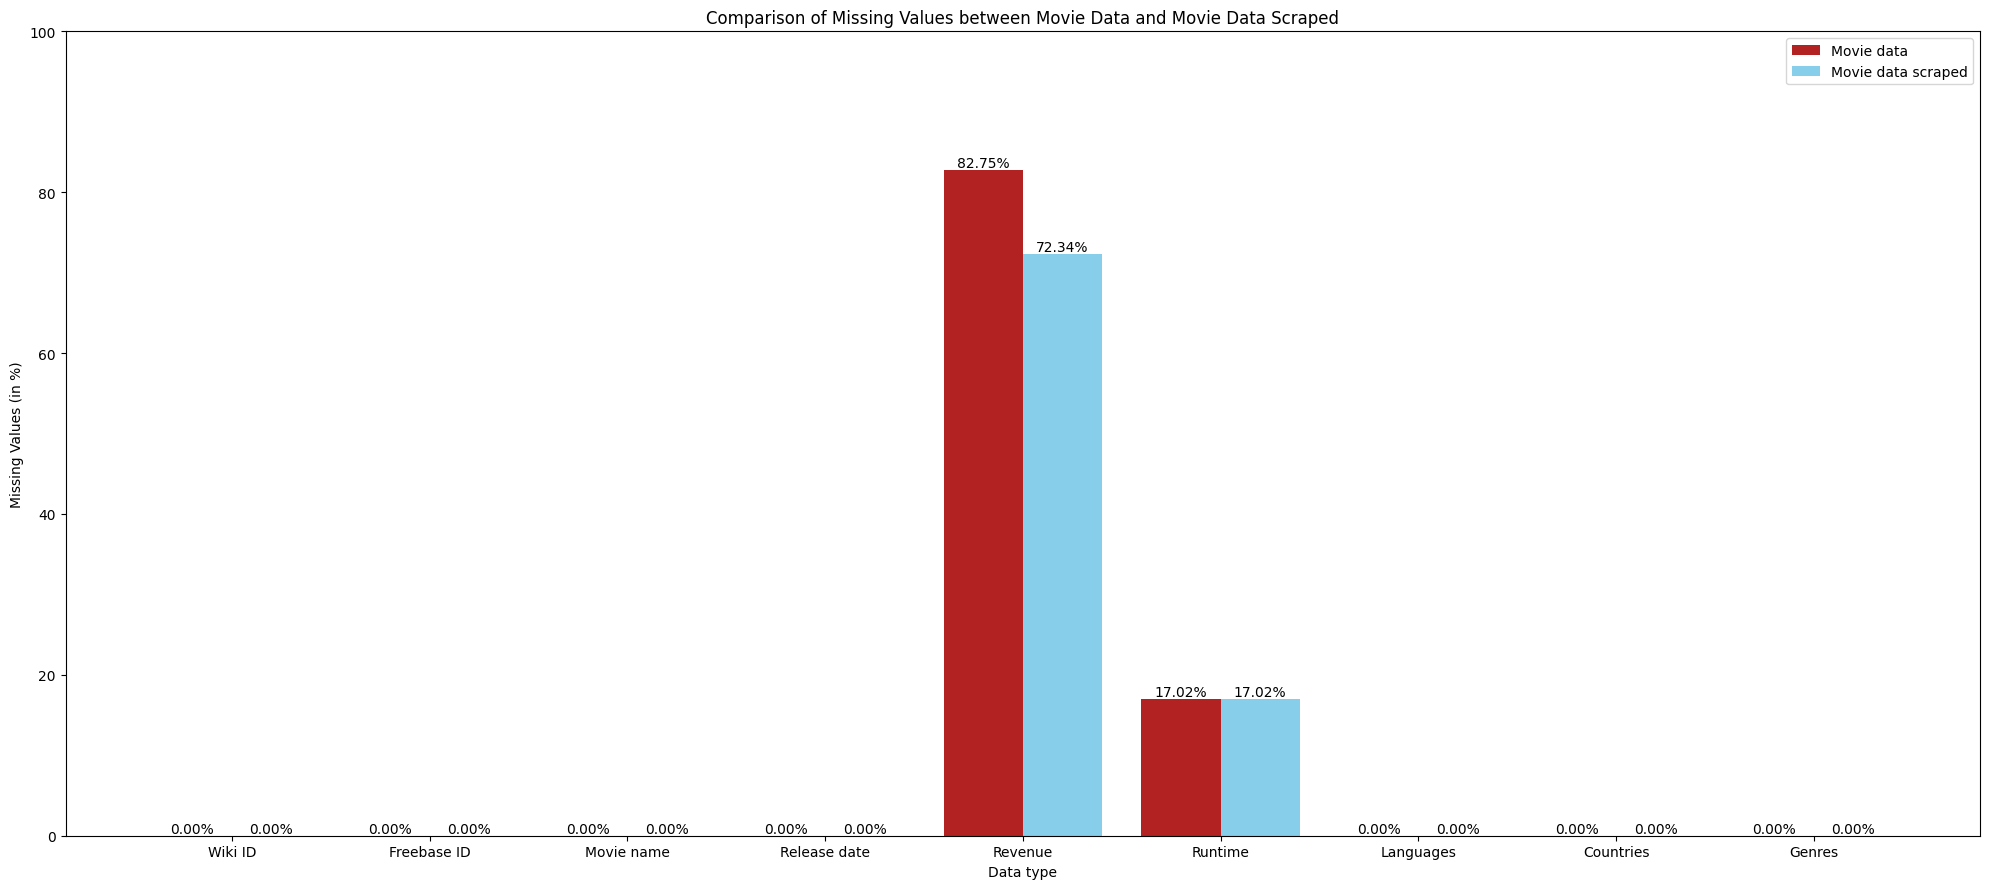

In [319]:
fig, ax = plt.subplots(figsize=(20, 9))

columns_to_keep = RAW.movie_data_scraped.columns[:-3]  # Selecting columns except the last three
new_df = RAW.movie_data_scraped[columns_to_keep].copy()
missing_percentage_new_df = (new_df.isnull().sum() / len (new_df)) * 100

# Plotting the bar chart for character data
bar_width = 0.4
x_indexes = range(len(missing_percentage_movie_data))
bars1 = ax.bar(x_indexes, missing_percentage_movie_data.values, width=bar_width, color='firebrick', label='Movie data')

# Plotting the bar chart for movie data shifted by bar_width
bars2 = ax.bar([i + bar_width for i in x_indexes], missing_percentage_new_df.values, width=bar_width, color='skyblue', label='Movie data scraped')

ax.set_xlabel('Data type')
ax.set_ylabel('Missing Values (in %)')
ax.set_title('Comparison of Missing Values between Movie Data and Movie Data Scraped')
ax.set_xticks([i + bar_width / 2 for i in x_indexes])
ax.set_xticklabels(missing_percentage_movie_data.index)  # Using movie data index for x-axis labels
ax.set_ylim(0, 100)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{missing_percentage_movie_data[i]:.2f}%', ha='center', va='bottom', fontsize=10)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{missing_percentage_new_df.values[i]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

By looking at the ages of the actors in the character dataframe, we notice that the minimum age at release is -7,896 years old, which is nonsensical. We can therefore filter the ages, for instance only take positive ages:

In [320]:
clean_character_data = RAW.character_data.copy()

clean_character_data = clean_character_data[clean_character_data['Actor age at release'] >= 0]

Then, in the same dataframe, we see that the range of heights (in meters) is [0.61, 510]. We can also consider heights that are below 2.5m:

In [321]:
clean_character_data = clean_character_data[clean_character_data['Actor height'] < 2.5]

We can now save the clean character data; this is the data we will use for every step of the project:

In [322]:
clean_character_data.to_csv("../Clean data/clean_character_data.csv")

For the movie data, we noticed that the movie runtimes are in the interval [0.1, 5700] (in hours). We therefore cut this interval to movies below 5 hours, or 300 minutes. Also, one movie alledgedly was nominated for 634 awards and won 389, so we will cut to keep wins below 200 and nominations below 300:

In [323]:
clean_movie_data = RAW.movie_data_scraped.copy()

Since we couldn't retrieve the number of wins and nominations for some movies, we will simply put the missing values (currently represented by None values) at zero:

In [324]:
clean_movie_data['Wins'].fillna(0, inplace=True)
clean_movie_data['Nominations'].fillna(0, inplace=True)

In [325]:
print(clean_movie_data.shape)

clean_movie_data = clean_movie_data[clean_movie_data['Runtime'] < 300]
clean_movie_data = clean_movie_data[clean_movie_data['Wins'] < 200]
clean_movie_data = clean_movie_data[clean_movie_data['Nominations'] < 300]

print(clean_movie_data.shape)

clean_movie_data

(39372, 12)
(32590, 12)


,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,0.0,2.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.0,0.0,0.0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",5.9,0.0,0.0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",6.9,1.0,6.0
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",5.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39367,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","{""/m/01z02hx"": ""Sports"", ""/m/0lsxr"": ""Crime Fi...",NaN,0.0,0.0
39368,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",4.6,0.0,0.0
39369,34980460,/m/0g4pl34,Knuckle,2011-01-21,2647.0,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",6.8,1.0,4.0
39370,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",5.8,0.0,0.0


We can now save the dataframe just like we did with the character data:

In [326]:
clean_movie_data.to_csv("../Clean data/clean_movie_data.csv")

## Data visualisation

### A closer look at genres

To look at movie genres and focus on them in particular, we first need to drop all the movies that don't have a 'genre' feature so as not to be bothered with useless data. 

Let's start by dropping the NaN values in the "gender" column:

In [327]:
cleaned_movie_data = pd.read_csv("../Clean data/clean_movie_data.csv")

#We can then drop the movies that contain no genre features so we erase movies that have a value of "NaN" in "Genres"
cleaned_movie_data = cleaned_movie_data.dropna(subset=['Genres'])

#As we showed before, our dataframe doesn't contain any "NaN" values for the columns "Genres" but we still apply this function to be sure to work on clean datas
cleaned_movie_data

,Unnamed: 0,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,0.0,2.0
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.0,0.0,0.0
2,2,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",5.9,0.0,0.0
3,3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",6.9,1.0,6.0
4,4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",5.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32585,39367,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","{""/m/01z02hx"": ""Sports"", ""/m/0lsxr"": ""Crime Fi...",NaN,0.0,0.0
32586,39368,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",4.6,0.0,0.0
32587,39369,34980460,/m/0g4pl34,Knuckle,2011-01-21,2647.0,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",6.8,1.0,4.0
32588,39370,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",5.8,0.0,0.0


Function to take only the values of the film genre directory:

- Genres are in the form {"key1": "Genre1", "key2": "GenreN",...., "keyN": "GenreN"}

- We'll use a function to take only the genre and put it in the form ["Genre1", "Genre2",..., "GenreN"]


In [328]:
#Only keeps the values of the dictionaries
def extract_genres(genre_str):
    try:
        genre_dict = ast.literal_eval(genre_str)
        return list(genre_dict.values())
    except (ValueError, SyntaxError) as e:
        print(f"Error converting string to dictionary. Error: {e}")
        return []

We apply it to our **clean_movie_data**.

- We'll use this function in all **Genres** columns to change the form {"key1": "Genre1", "key2": "GenreN",...., "keyN": "GenreN"} to ["Genre1", "Genre2",..., "GenreN"].

In [329]:
#Apply the cleaning function to data. Generates the new "Genres" column
Cleaned_genres = cleaned_movie_data['Genres'].apply(extract_genres)

- **Cleaned_genres** is our column containing all the genres of all the data with a list instead of a dictionary. 

- We change the **"Genres"** column in our cleaned_movie_data by the **Cleaned_genres** column we've just created

In [330]:
#Inject the new "Genres" in Movie data without NaN and with cleaned up Genres
cleaned_movie_data["Genres"] = Cleaned_genres

#Looking at how many movies our dataset contains
print(len(cleaned_movie_data))

32590


- Our dataset seems to contain a lot of different genres, and the first step will be to count them and see whether the genres appear recurrently or not. 

- If some genres appear very infrequently, they can be eliminated to obtain a clean dataset.

Let's start taking a look at the numbers of genres 

In [331]:
#Counts the numbers of appearance of each genre in all movies
exploded_genres = cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()

#A quick look at the numbers of appearance of each genre in all movies
genre_counts

Genres
Drama                   15394
Comedy                   8149
Romance Film             5151
Thriller                 4678
Action                   4029
                        ...  
Z movie                     1
Chick flick                 1
Hardcore pornography        1
Clay animation              1
C-Movie                     1
Name: count, Length: 346, dtype: int64

As we can see, it seems that some genres contain only a few number of movies.

But first, let's take a look at the list of genres and how many unique genres there are.

In [332]:
#List of genres before threshold filtering
unique_genres_list = genre_counts.index.tolist()

unique_genres_list

['Drama',
 'Comedy',
 'Romance Film',
 'Thriller',
 'Action',
 'Black-and-white',
 'Crime Fiction',
 'World cinema',
 'Indie',
 'Adventure',
 'Action/Adventure',
 'Short Film',
 'Horror',
 'Family Film',
 'Musical',
 'Romantic drama',
 'Mystery',
 'Documentary',
 'Romantic comedy',
 'Silent film',
 'Comedy film',
 'Science Fiction',
 'Fantasy',
 'Animation',
 'Crime Thriller',
 'War film',
 'Japanese Movies',
 'Western',
 'Period piece',
 'Comedy-drama',
 'Film adaptation',
 'Psychological thriller',
 'Biography',
 'Sports',
 'Biographical film',
 'Black comedy',
 'Teen',
 'Coming of age',
 "Children's/Family",
 'Family Drama',
 'Bollywood',
 'LGBT',
 'Parody',
 'Television movie',
 'Suspense',
 'Music',
 'Cult',
 'Satire',
 'Chinese Movies',
 'Political drama',
 'History',
 'Slapstick',
 'Film noir',
 'Melodrama',
 'Biopic [feature]',
 'Supernatural',
 "Children's",
 'Martial Arts Film',
 'Slasher',
 'Costume drama',
 'Crime Drama',
 'Action Thrillers',
 'Historical fiction',
 'Buddy 

Let's then look at how many different uniques genres our dataset contains

In [333]:
#See how many unique genres our dataset contains

print(len(unique_genres_list))

346


Actually, 346 is a big amount of genres, so let's see the distribution of these genres:

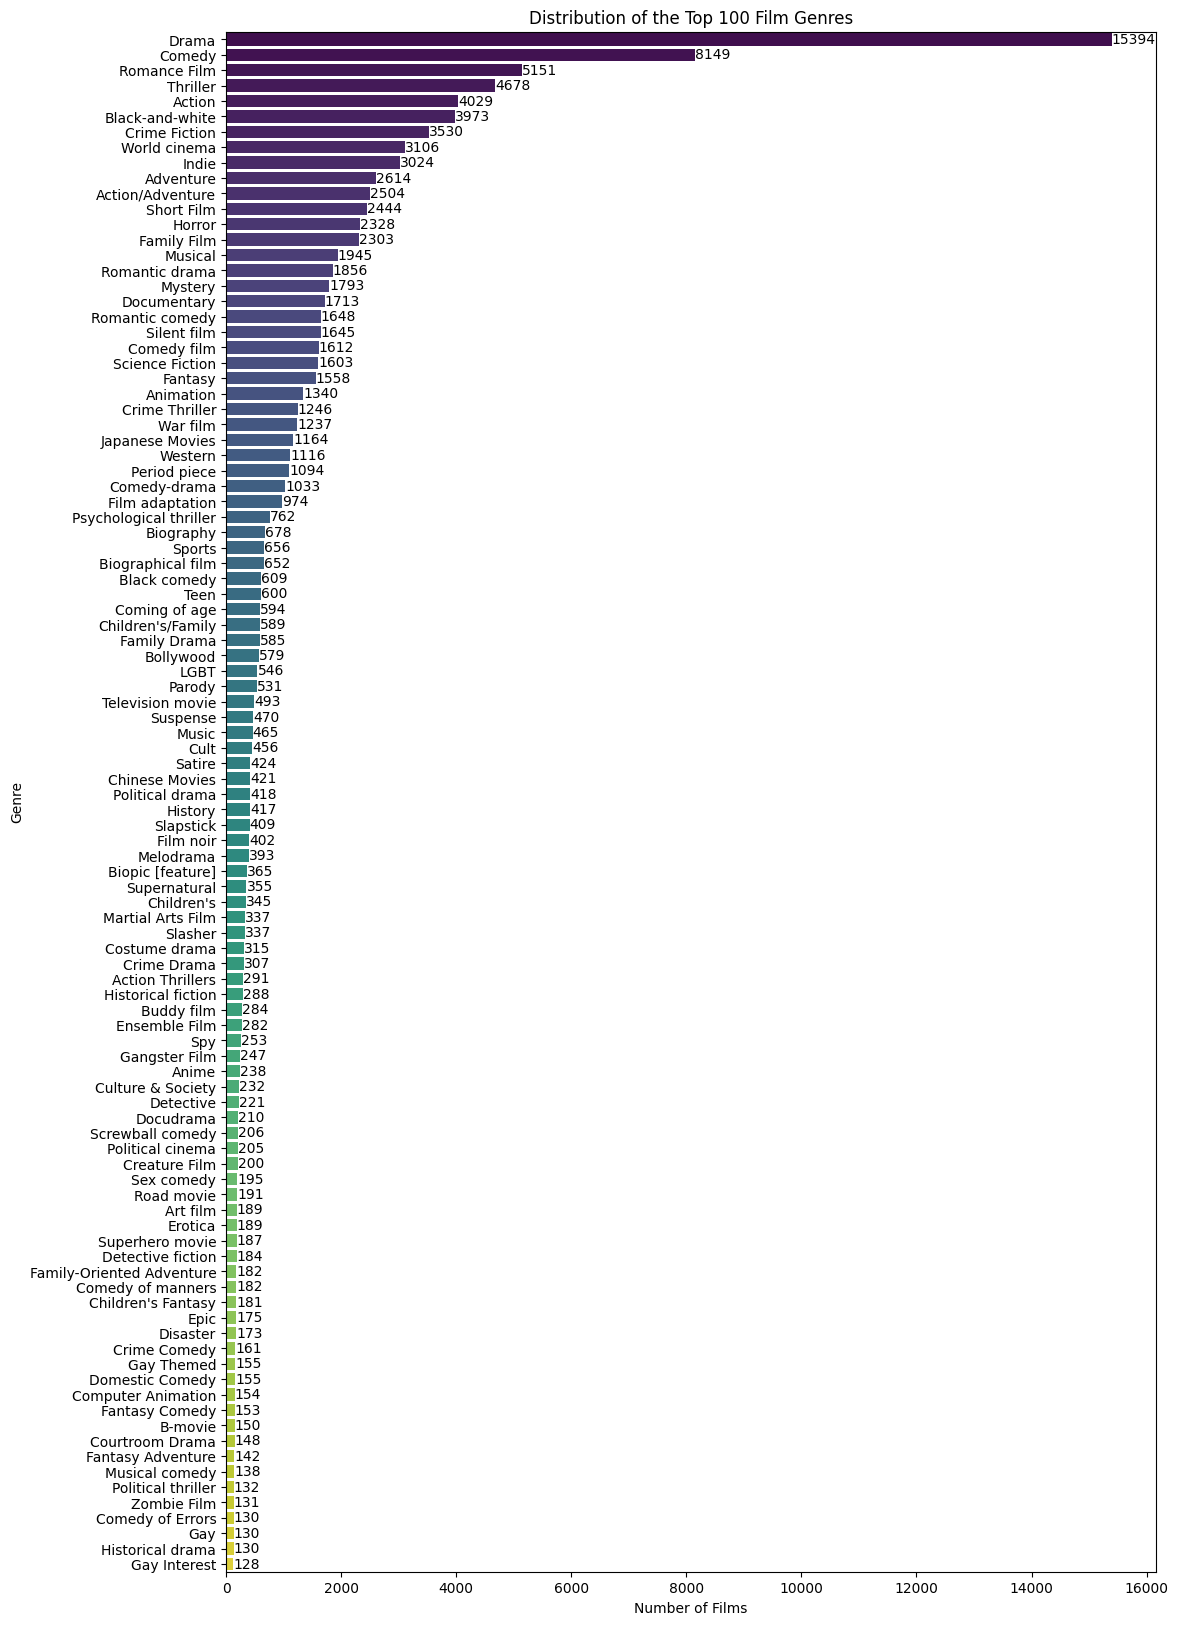

In [334]:
# Select the top 100 genres based on counts
top_genres = genre_counts.head(100)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 20))
barplot = sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')

# Add labels and a title to the plot
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.title('Distribution of the Top 100 Film Genres')

# Add numeric values to the right of each bar
for index, value in enumerate(top_genres.values):
    barplot.text(value, index, str(value), ha='left', va='center')

# Show the plot
plt.show()

As we can see from this histogram, there are many film genres that represent very few films (heavy tail). An interesting idea to avoid getting lost in our data would be to remove the film genres that only feature a certain number of films. 

Let's introduce an arbitrary threshold of 1000 to only keep movie genders that define 1'000 movies or more:

In [335]:
#Threshold of 1'000
threshold = 1000
# Filter out genres below the threshold
filtered_genres = genre_counts[genre_counts >= threshold].index.tolist()

# Creates filter for the original DataFrame based on the threshold
filtered_genres = cleaned_movie_data.apply(lambda row: [genre for genre in row['Genres'] if genre in filtered_genres], axis=1)

In [336]:
#Inject the modified "Genres"
cleaned_movie_data["Genres"] = filtered_genres

In [337]:
#Counts the counts for each genre in all movies after threshold filter
exploded_genres = cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()
genre_counts

Genres
Drama               15394
Comedy               8149
Romance Film         5151
Thriller             4678
Action               4029
Black-and-white      3973
Crime Fiction        3530
World cinema         3106
Indie                3024
Adventure            2614
Action/Adventure     2504
Short Film           2444
Horror               2328
Family Film          2303
Musical              1945
Romantic drama       1856
Mystery              1793
Documentary          1713
Romantic comedy      1648
Silent film          1645
Comedy film          1612
Science Fiction      1603
Fantasy              1558
Animation            1340
Crime Thriller       1246
War film             1237
Japanese Movies      1164
Western              1116
Period piece         1094
Comedy-drama         1033
Name: count, dtype: int64

We can then look at the number of unique genres:

In [338]:
#List of genres before threshold filtering
unique_genres_list = genre_counts.index.tolist()

print(len(unique_genres_list))

30


We now have only 30 different genres.

Let's look at the histogram distribution of the number of movie per genre.

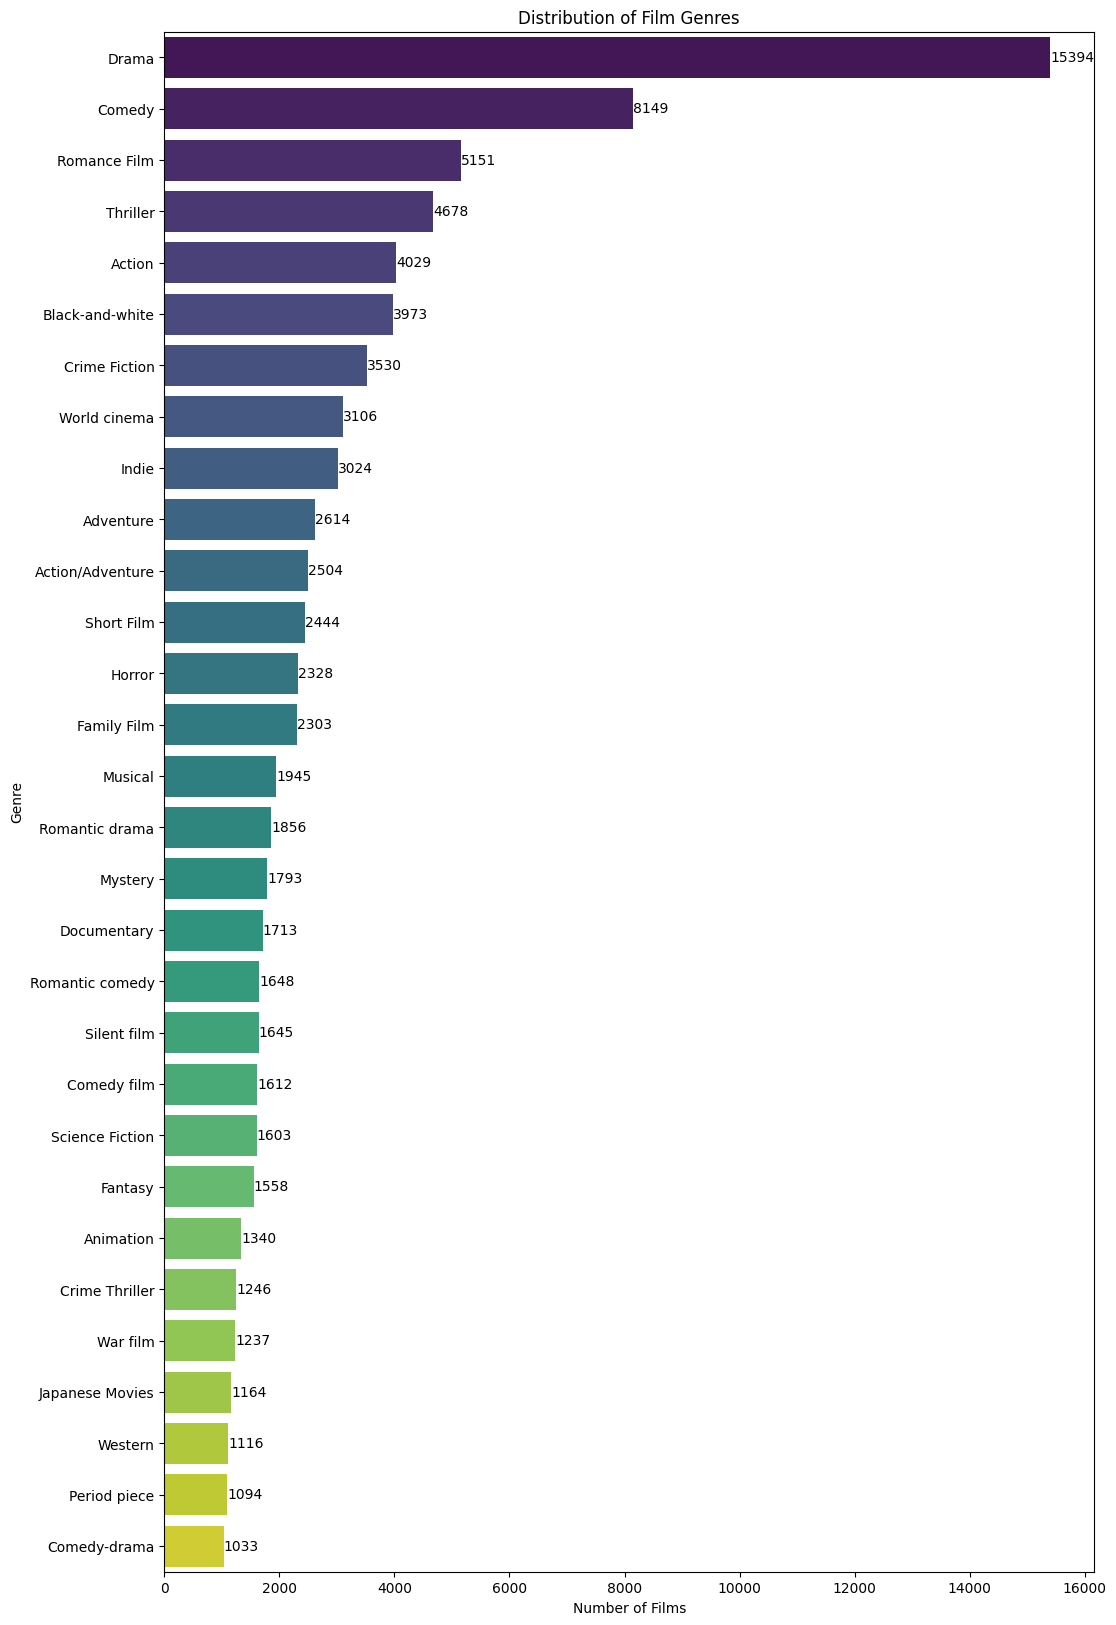

In [339]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 20))
barplot = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')

# Add labels and a title
plt.xlabel('Number of Films')
plt.ylabel('Genre')
plt.title('Distribution of Film Genres')

# Add numerical values to the right of each bar
for index, value in enumerate(genre_counts.values):
    barplot.text(value, index, str(value), ha='left', va='center')

plt.show()


This plot now shows the main genres that we will consider. The threshold of 1,000 seems to allow us to keep relevant enough genres.

For this next part, we can look at how many movies of a specific genre every actor has starred in. For that, we first import the movie data and discard the movies with unspecified genres:

In [340]:
cleaned_movie_data_genres = RAW.movie_data.copy()
# Filtering-out genres which are NaN
cleaned_movie_data_genres = cleaned_movie_data_genres.dropna(subset=['Genres'])

In [341]:
#Apply the cleaning function to data. Generates the new "Genres" column
Cleaned_genres = cleaned_movie_data_genres['Genres'].apply(extract_genres)

Now we change the 'genres' column to obtain a better data storage (genres are in a list):

In [342]:
cleaned_movie_data_genres["Genres"] = Cleaned_genres
cleaned_movie_data_genres

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Musical, Comedy, Black-and-white]"
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Romantic comedy, Ensemble Film, Comedy-drama,..."
...,...,...,...,...,...,...,...,...,...
81735,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","[Sports, Crime Fiction, Action, Drama]"
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",[Drama]
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","[Biographical film, Drama, Documentary]"
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Satire, Comedy]"


If there are movies in the data whose cast does not belong inside of our character data, we drop them:

In [343]:
#Makes sure to only keep movies with actors in our character metadata
result_cleaned_movie_data = cleaned_movie_data_genres[cleaned_movie_data_genres["Wiki ID"].isin(RAW.character_data["Wiki ID"])]

Now, we can count the occurence of all genres in the remaining movies:

In [344]:
#Counts the numbers of appearance of each genre in all movies
exploded_genres = result_cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()

genre_counts

Genres
Drama                   16150
Comedy                   8948
Romance Film             5543
Black-and-white          5070
Thriller                 4834
                        ...  
Prison escape               1
Chick flick                 1
Race movie                  1
Breakdance                  1
Hardcore pornography        1
Name: count, Length: 346, dtype: int64

Some genres are very rare, so we only keep common genres (with an arbitrary threshold of at least 2,000 movies):

In [345]:
# Set your threshold value
thresh = 2000  

# Filter out genres below the threshold
filtered_genres = genre_counts[genre_counts >= thresh].index.tolist()

# Creates filter for the original DataFrame based on the threshold
filtered_genres = result_cleaned_movie_data.apply(lambda row: [genre for genre in row['Genres'] if genre in filtered_genres], axis=1)

In [346]:
#Inject the modified "Genres" in
result_cleaned_movie_data["Genres"] = filtered_genres

C:\Users\aouzi\AppData\Local\Temp\ipykernel_24452\1552177804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cleaned_movie_data["Genres"] = filtered_genres


In [347]:
#Counts the counts for each genre in all movies after threshold filter
exploded_genres = result_cleaned_movie_data['Genres'].explode()
genre_counts = exploded_genres.value_counts()

genre_counts

Genres
Drama               16150
Comedy               8948
Romance Film         5543
Black-and-white      5070
Thriller             4834
Action               4598
Indie                3847
Crime Fiction        3562
Short Film           3178
Silent film          3155
World cinema         3104
Adventure            2715
Family Film          2530
Action/Adventure     2520
Horror               2328
Name: count, dtype: int64

We are left with 15 genres.

In [348]:
#List of genres after threshold filtering
unique_genres_list = genre_counts.index.tolist()
unique_genres_list

['Drama',
 'Comedy',
 'Romance Film',
 'Black-and-white',
 'Thriller',
 'Action',
 'Indie',
 'Crime Fiction',
 'Short Film',
 'Silent film',
 'World cinema',
 'Adventure',
 'Family Film',
 'Action/Adventure',
 'Horror']

Now, we merge the character and movie data:

In [349]:
#Merging the modified Genres to the characters
character_data_ft_Genres = pd.merge(RAW.character_data, result_cleaned_movie_data[['Wiki ID', 'Genres']], on='Wiki ID', how='left')

In [350]:
#Deletes any row which does not have any genre after threshold filtering
character_data_ft_Genres = character_data_ft_Genres[character_data_ft_Genres['Genres'].apply(lambda x: isinstance(x, list) and len(x) > 0)]

We can now create empty columns for each genre, and afterwards we can increment the counts:

In [351]:
#Creates the Genre columns filled with value 0
unique_genres_list

for Genre in unique_genres_list:
    character_data_ft_Genres[Genre] = 0

In [352]:
#Adds 1 if the Genre of the character's movie is present
for Genre in unique_genres_list:
    character_data_ft_Genres[Genre] = character_data_ft_Genres['Genres'].apply(lambda x: 1 if Genre in x else 0)

In [353]:
# Initialize a dictionary to store genre counts for each actor
actor_genre_counts = {}

# Iterate over each row and update the genre counts for each actor
for index, row in character_data_ft_Genres.iterrows():
    actor_name = row['Actor name']
    genres = row['Genres']
    
    if actor_name not in actor_genre_counts:
        actor_genre_counts[actor_name] = {genre: 0 for genre in unique_genres_list}
    
    for genre in genres:
        if genre in unique_genres_list:
            actor_genre_counts[actor_name][genre] += 1

# Create a new DataFrame from the dictionary
actor_genre_counts_df = pd.DataFrame.from_dict(actor_genre_counts, orient='index')

actor_genre_counts_df

,Drama,Comedy,Romance Film,Black-and-white,Thriller,Action,Indie,Crime Fiction,Short Film,Silent film,World cinema,Adventure,Family Film,Action/Adventure,Horror
Wanda De Jesus,5,1,0,0,6,5,2,6,0,0,0,1,0,3,1
Natasha Henstridge,4,3,3,0,5,6,0,2,0,0,0,4,4,5,4
Ice Cube,12,13,1,0,5,9,1,8,0,0,0,5,2,7,2
Jason Statham,12,5,2,0,21,22,1,16,0,0,1,4,2,15,1
Clea DuVall,15,7,3,0,10,2,6,5,1,0,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
笠原弘子,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
Violet Bronte,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
Sonny Byrkett,2,0,0,0,0,0,0,0,2,0,0,2,0,0,0
Susan Byrkett,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


### A story of movies along years

First, we want to analyze how the number of movies released evolved through the years. We use again a dataframe that only keeps movies in which genres appear at least 100 times.

In [354]:
cleaned_movie_data_year = cleaned_movie_data.copy()

# Conversion of the column 'release date' to datetime if it's not done
cleaned_movie_data_year['Release date'] = pd.to_datetime(cleaned_movie_data_year['Release date'], errors='coerce')

# Extraction of the year in each of the release date and creation of a new column containing only the year of release
cleaned_movie_data_year['year'] = cleaned_movie_data_year['Release date'].dt.year

# Count the number of movie per year
movies_per_year = cleaned_movie_data_year['year'].value_counts().sort_index()

# display the number of movies per year
print(movies_per_year)

year
1894       1
1895       3
1896       2
1898       7
1899       1
        ... 
2009    1155
2010    1096
2011    1142
2012     527
2013       9
Name: count, Length: 119, dtype: int64


Now, we plot the number of movies released per year:

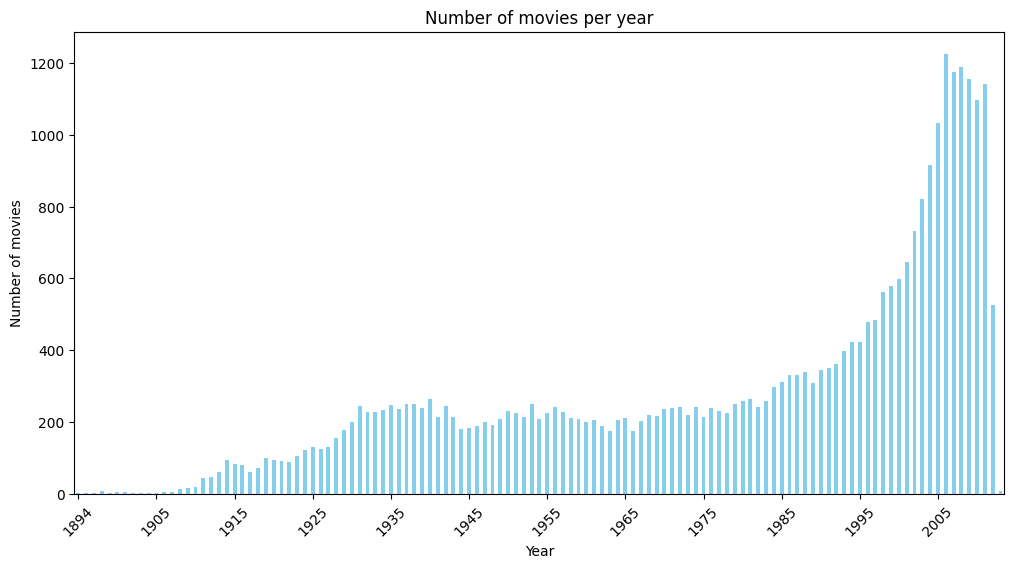

In [355]:
# Plotting
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')

plt.title('Number of movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

labels = movies_per_year.index

# For rading issues, we only display on the x-axis 10 years by 10 years
plt.xticks(range(0, len(labels), 10), labels[::10], rotation=45)

plt.show()

There is an exponential increase in the number of movies across the years.

In [356]:
# We divide the years by decades 
bins = [min(cleaned_movie_data_year['year'])-1,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010, max(cleaned_movie_data_year['year'])+1] 
labels = ['<1920','1920s','1930s','1940s','1950s','1960s', '1970s','1980s','1990s', '2000s', '2010-']

#The last interval is because our data stops at 2013

number_of_movies_each_ten_years = cleaned_movie_data_year.copy()

# The cut function allows to separate the data by decade 
number_of_movies_each_ten_years['Decade'] = pd.cut(number_of_movies_each_ten_years['year'], bins=bins, labels=labels)

number_of_movies_each_ten_years = number_of_movies_each_ten_years['Decade'].value_counts().sort_index().reset_index()

number_of_movies_each_ten_years.columns = ['Decade', 'Number of Films']

#we will add a column decade for our cleaned_movie_data_year 

cleaned_movie_data_year['Decade'] = pd.cut(cleaned_movie_data_year['year'], bins=bins, labels=labels)

number_of_movies_each_ten_years

,Decade,Number of Films
0,<1920,820
1,1920s,1323
2,1930s,2417
3,1940s,2056
4,1950s,2214
5,1960s,2043
6,1970s,2360
7,1980s,3029
8,1990s,4659
9,2000s,9991


Now, we are ready to plot the barplot:

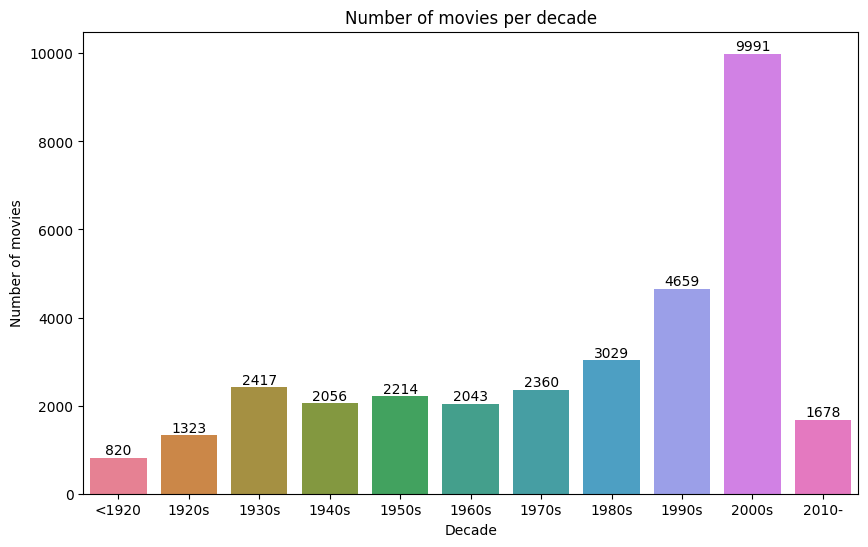

In [357]:
# Convert into DataFrames
number_of_movies_each_ten_years_df = pd.DataFrame(number_of_movies_each_ten_years)

# Choose a color palette for each decade
colors = sns.color_palette("husl", n_colors=len(number_of_movies_each_ten_years_df))

# Creation of a barplot 
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Decade', y='Number of Films', data=number_of_movies_each_ten_years_df , palette= colors)
for i in ax.containers:
        
        ax.bar_label(i,)
# Addition of titles and legend
plt.title('Number of movies per decade')
plt.xlabel('Decade')
plt.ylabel('Number of movies')

# Display the graph
plt.show()

The most represented decade is the 2000s. We still see the exponential increase in movies just like the previous graph.

We now want to have a row for each genre of every movie (as to have multiple rows for one movie). We therefore 'explode' the data:

In [358]:
#To anlyse the genres of movies per decade, we need to explode the data

cleaned_movie_data_year_genres = cleaned_movie_data_year.explode('Genres') 

cleaned_movie_data_year_genres

,Unnamed: 0,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations,year,Decade
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Thriller,4.9,0.0,2.0,2001,2000s
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Science Fiction,4.9,0.0,2.0,2001,2000s
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Horror,4.9,0.0,2.0,2001,2000s
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Adventure,4.9,0.0,2.0,2001,2000s
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Action,4.9,0.0,2.0,2001,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32589,39371,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Japanese Movies,NaN,0.0,0.0,1992,1990s
32589,39371,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Adventure,NaN,0.0,0.0,1992,1990s
32589,39371,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Animation,NaN,0.0,0.0,1992,1990s
32589,39371,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}",Short Film,NaN,0.0,0.0,1992,1990s


In [359]:
# Count the number of identical rows
identical_rows = cleaned_movie_data_year_genres.duplicated().sum()

print("Number of identical rows in the dataframe:", identical_rows)

Number of identical rows in the dataframe: 1


We have actually a two identical lines so we have to remove one of them

In [360]:
# check the duplicates
duplicates_genres = cleaned_movie_data_year_genres[cleaned_movie_data_year_genres.duplicated(subset=['Wiki ID', 'Genres'], keep=False)]

# display the two identical lines 
print("Lines with duplicate genres for the same movie:")

duplicates_genres

Lines with duplicate genres for the same movie:


,Unnamed: 0,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations,year,Decade
2140,2567,34480764,/m/06w99h3,Rango,2011-02-14,245375374.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Western,7.2,46.0,25.0,2011,2010-
2140,2567,34480764,/m/06w99h3,Rango,2011-02-14,245375374.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Western,7.2,46.0,25.0,2011,2010-


Delete the duplicate row:

In [361]:
# Remove duplicate rows based on the 'Wiki ID' and 'Genres' columns
cleaned_movie_data_year_genres = cleaned_movie_data_year_genres.drop_duplicates(subset=['Wiki ID', 'Genres'], keep='first')

In [362]:
# Analyse most frequent genres per decade
genres_by_decade = cleaned_movie_data_year_genres.groupby(['Decade', 'Genres']).size().unstack(fill_value=0)

genres_by_decade

Genres,Action,Action/Adventure,Adventure,Animation,Black-and-white,Comedy,Comedy film,Comedy-drama,Crime Fiction,Crime Thriller,...,Romance Film,Romantic comedy,Romantic drama,Science Fiction,Short Film,Silent film,Thriller,War film,Western,World cinema
Decade,,,,,,,,,,,,,,,,,,,,,
<1920,11,3,28,5,638,198,21,5,13,1,...,42,7,7,9,495,761,3,14,124,9
1920s,56,13,71,23,709,357,81,23,68,4,...,187,32,35,10,310,866,23,32,96,24
1930s,208,113,186,96,1158,652,224,38,275,60,...,432,118,73,18,369,4,137,83,199,15
1940s,146,99,135,79,745,448,145,26,288,100,...,321,90,68,17,206,1,240,197,146,29
1950s,195,146,225,71,465,418,163,23,242,59,...,349,74,100,89,105,0,177,136,164,95
1960s,208,151,215,53,188,517,92,43,221,54,...,254,89,77,99,59,1,197,136,126,179
1970s,347,254,201,61,18,470,114,57,282,93,...,229,47,106,127,41,1,363,81,99,220
1980s,523,319,310,132,10,825,99,117,360,124,...,476,165,179,262,64,1,498,106,37,225
1990s,703,446,398,194,22,1379,125,267,632,266,...,888,317,396,274,120,2,889,113,56,485


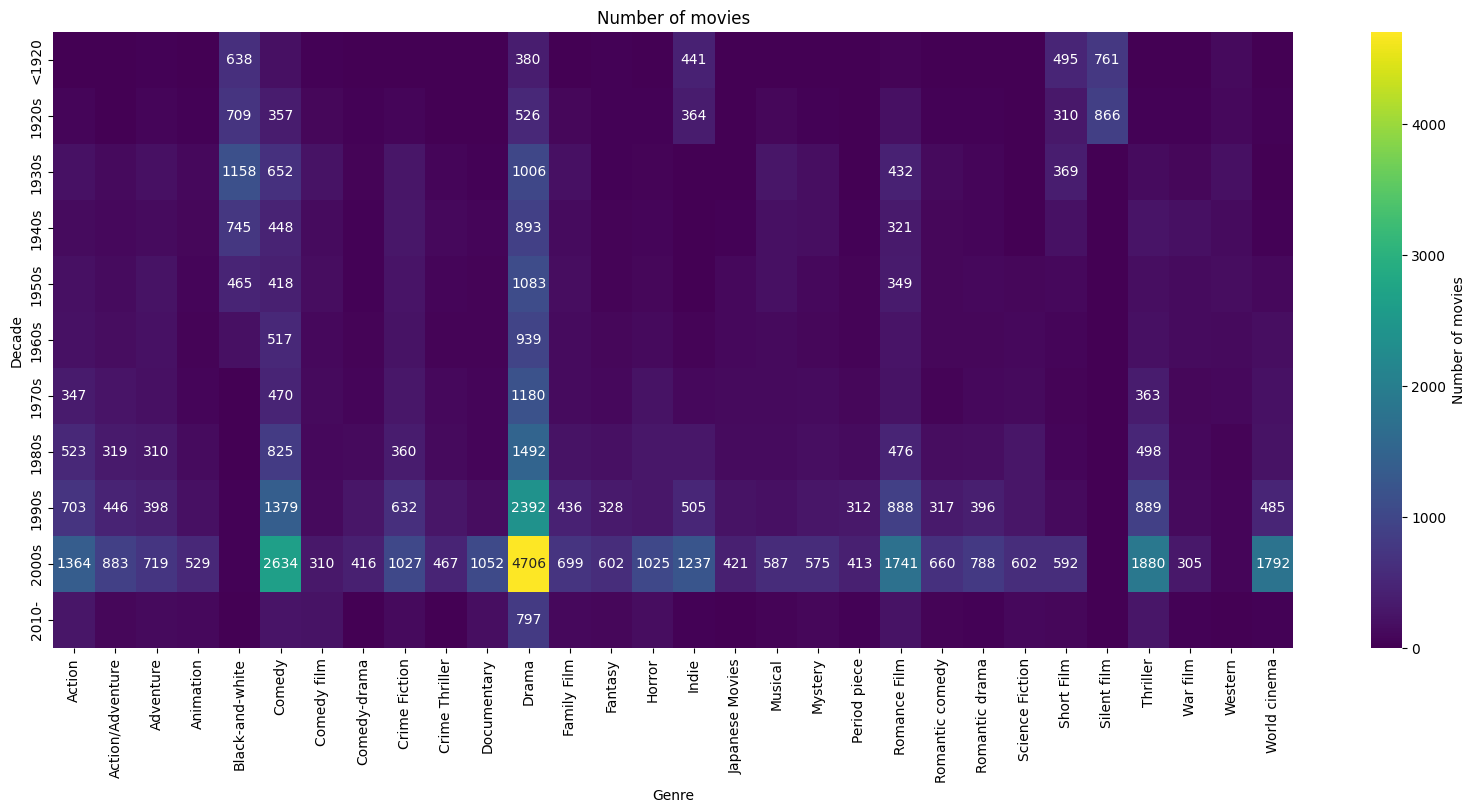

In [363]:
# Set the size of the plot
plt.figure(figsize=(20, 8))

# Create a heatmap using Seaborn
heatmap = sns.heatmap(genres_by_decade, annot=True, fmt=".0f", cmap='viridis', cbar_kws={'label': 'Number of movies'})

# Add titles and labels
plt.title('Number of movies')
plt.xlabel('Genre')
plt.ylabel('Decade')

# Hide annotations for values below 300
for text in heatmap.texts:
    if float(text.get_text().replace(",", "")) < 300:
        text.set_text("")

# Show the plot
plt.show()


The following function extracts the n most common genres alongside their counts for a given decade:

In [364]:
def extract_top_genres(genre_by_decade, num_top_genres=6):
    result_df = pd.DataFrame()

    for i in range(1, num_top_genres + 1):
        # Find the index of the most common genre for each decade using iloc
        genre_most_common = genre_by_decade.apply(lambda row: row.nlargest(i).index[-1], axis=1)

        # Find the number of movies for the most common genre using iloc
        genre_count = genre_by_decade.apply(lambda row: row.nlargest(i).iloc[-1], axis=1)
        if i == 1:
             result_df['Most Common Genre'] = genre_most_common
             result_df['Number of Movies for Most Common Genre'] = genre_count
            
        else: 

            result_df[f'{i}th Most Common Genre'] = genre_most_common
            result_df[f'Number of Movies for {i}th Most Common Genre'] = genre_count

    # Select only a 'Decade' column
    result_df['Decade'] = genre_by_decade.index

    return result_df

Most_Common_Genres_by_Decade = extract_top_genres(genres_by_decade, num_top_genres=5)
Most_Common_Genres_by_Decade


,Most Common Genre,Number of Movies for Most Common Genre,2th Most Common Genre,Number of Movies for 2th Most Common Genre,3th Most Common Genre,Number of Movies for 3th Most Common Genre,4th Most Common Genre,Number of Movies for 4th Most Common Genre,5th Most Common Genre,Number of Movies for 5th Most Common Genre,Decade
Decade,,,,,,,,,,,
<1920,Silent film,761,Black-and-white,638,Short Film,495,Indie,441,Drama,380,<1920
1920s,Silent film,866,Black-and-white,709,Drama,526,Indie,364,Comedy,357,1920s
1930s,Black-and-white,1158,Drama,1006,Comedy,652,Romance Film,432,Short Film,369,1930s
1940s,Drama,893,Black-and-white,745,Comedy,448,Romance Film,321,Crime Fiction,288,1940s
1950s,Drama,1083,Black-and-white,465,Comedy,418,Romance Film,349,Crime Fiction,242,1950s
1960s,Drama,939,Comedy,517,Romance Film,254,Crime Fiction,221,Adventure,215,1960s
1970s,Drama,1180,Comedy,470,Thriller,363,Action,347,Crime Fiction,282,1970s
1980s,Drama,1492,Comedy,825,Action,523,Thriller,498,Romance Film,476,1980s
1990s,Drama,2392,Comedy,1379,Thriller,889,Romance Film,888,Action,703,1990s


Here is a little abstract to attribute a specific color for evrey genre, it will help us visualise our graphs:

In [365]:
# Retrieve genres from the DataFrame
genres = genres_by_decade.columns.get_level_values(0).values

# Get unique values
unique_genres = pd.unique(genres)

# Use a color palette with seaborn
color_palette = sns.color_palette("husl", len(unique_genres))

# Create a mapping dictionary between genres and colors
color_mapping = dict(zip(unique_genres, color_palette))

# Apply colors to genres
genre_colors = [color_mapping[genre] for genre in genres]

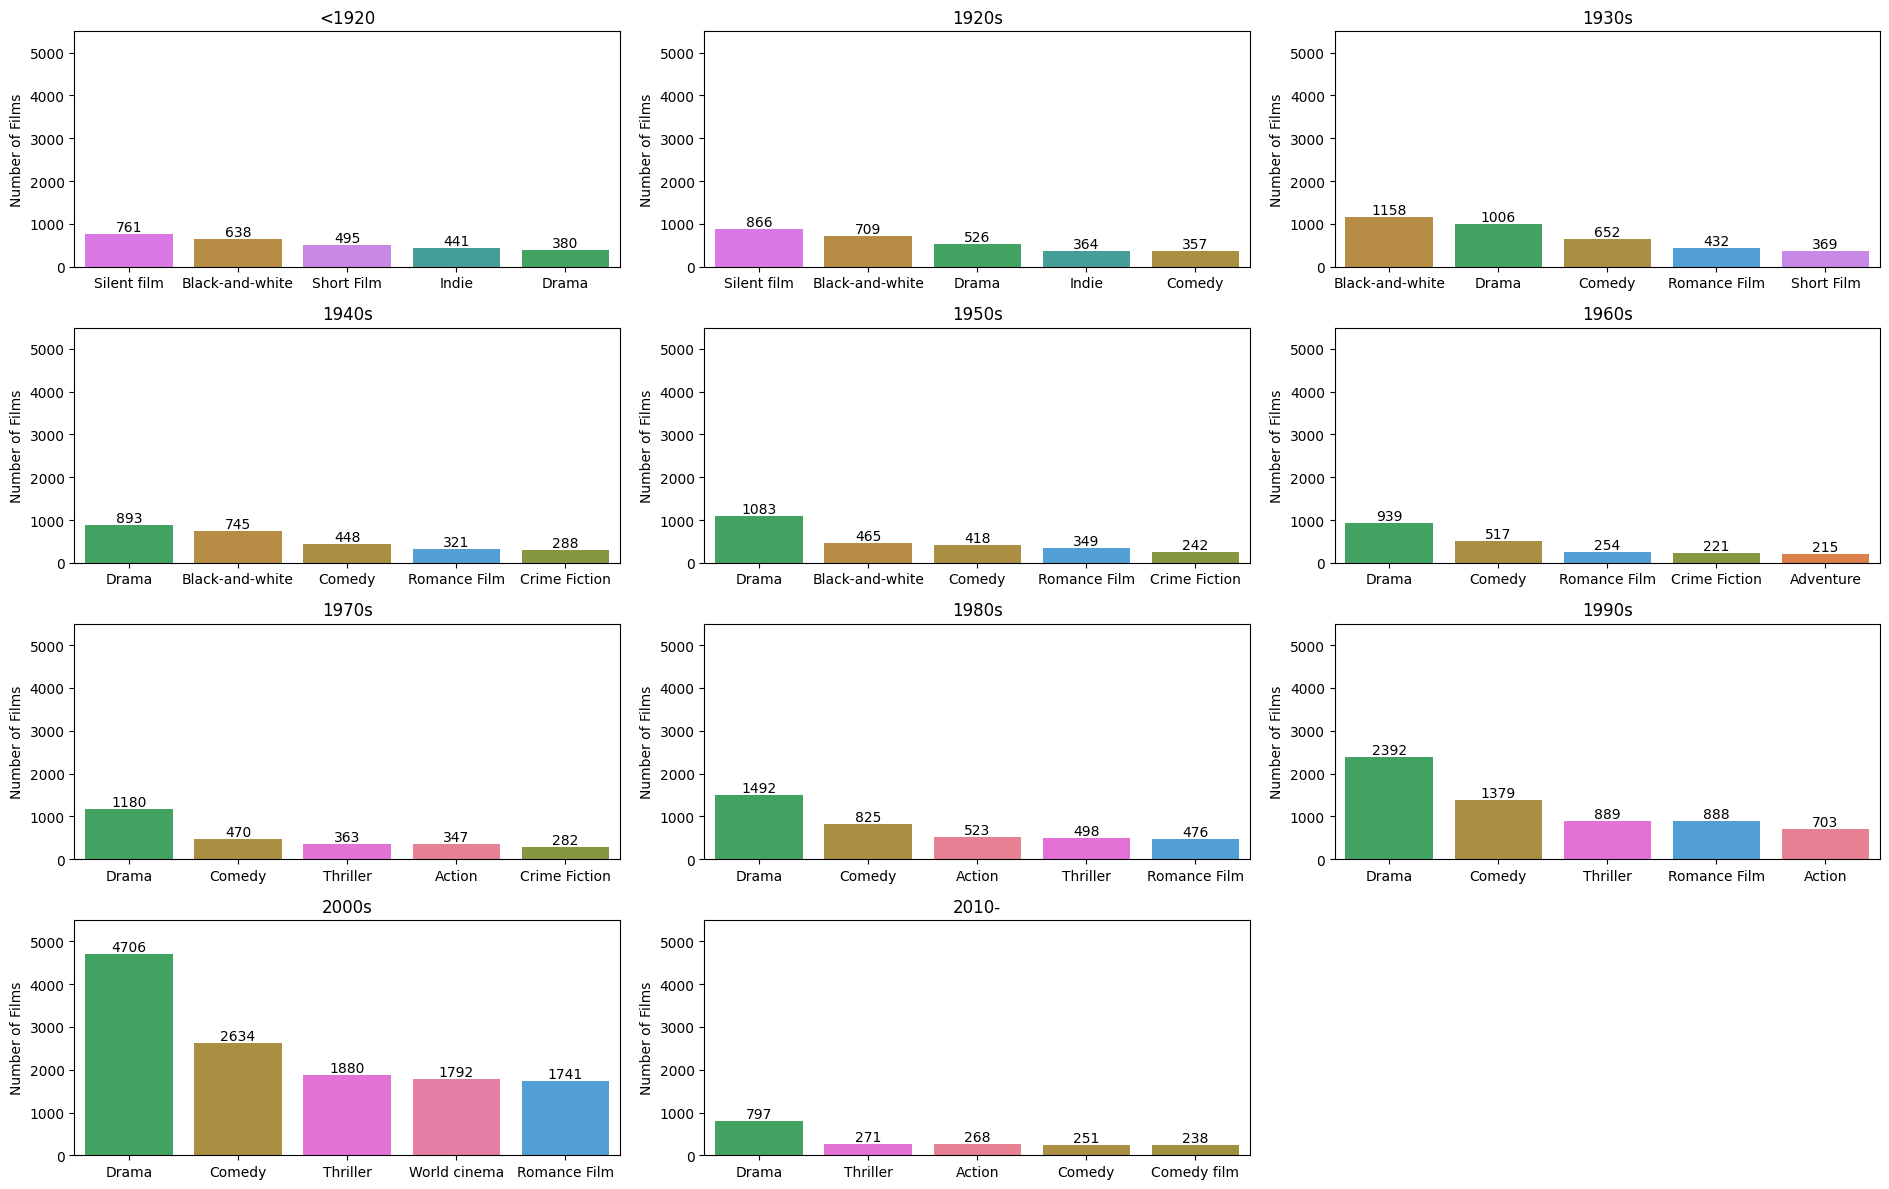

In [366]:
# number of subplots
num_subplots = 11 

# disposition of graphs
fig, axes = plt.subplots(4, 3, figsize=(19, 12))

# Flatten the list of axes for easier use in the loop
axes = axes.flatten()

# Loop to create subplots
for i in range(num_subplots):
    
    # Extract data for each subplot
    num_films = Most_Common_Genres_by_Decade.iloc[i, 1::2].values  # Take every 2nd element starting from the 2nd one (number of films)
    film_genres = Most_Common_Genres_by_Decade.iloc[i, 0::2][:-1].values  # Exclude the decade
    
    # Create a DataFrame with genres and number of films
    df_result = pd.DataFrame(data={'Number of Films': num_films}, index=film_genres)
    
    # Create a barplot with seaborn
    ax = sns.barplot(x=film_genres, y='Number of Films', data=df_result, palette=color_mapping, ax=axes[i])

    # Set the upper limit of the y-axis to 5000
    axes[i].set_ylim(0, 5500)
    axes[i].set_title(Most_Common_Genres_by_Decade.iloc[i, -1])
    
    # Add labels to the bars
    for container in ax.containers:
        ax.bar_label(container)

# Hide empty axes if any
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

Black and white movies as well as silent movies are not relevant genres, but rather types of movies in the 40s and before. So we decide to only analyse "real" genres.

In [367]:
# Remove the columns "Black-and-white" and "Silent film"
relevant_genres_by_decade = genres_by_decade.copy()

# Drop the columns "Black-and-white" and "Silent film"
relevant_genres_by_decade = relevant_genres_by_decade.drop(columns=["Black-and-white", "Silent film"], errors='ignore')

In [368]:
relevant_genre_most_made_by_decade = extract_top_genres(relevant_genres_by_decade, num_top_genres=5)
relevant_genre_most_made_by_decade


,Most Common Genre,Number of Movies for Most Common Genre,2th Most Common Genre,Number of Movies for 2th Most Common Genre,3th Most Common Genre,Number of Movies for 3th Most Common Genre,4th Most Common Genre,Number of Movies for 4th Most Common Genre,5th Most Common Genre,Number of Movies for 5th Most Common Genre,Decade
Decade,,,,,,,,,,,
<1920,Short Film,495,Indie,441,Drama,380,Comedy,198,Western,124,<1920
1920s,Drama,526,Indie,364,Comedy,357,Short Film,310,Romance Film,187,1920s
1930s,Drama,1006,Comedy,652,Romance Film,432,Short Film,369,Crime Fiction,275,1930s
1940s,Drama,893,Comedy,448,Romance Film,321,Crime Fiction,288,Thriller,240,1940s
1950s,Drama,1083,Comedy,418,Romance Film,349,Crime Fiction,242,Adventure,225,1950s
1960s,Drama,939,Comedy,517,Romance Film,254,Crime Fiction,221,Adventure,215,1960s
1970s,Drama,1180,Comedy,470,Thriller,363,Action,347,Crime Fiction,282,1970s
1980s,Drama,1492,Comedy,825,Action,523,Thriller,498,Romance Film,476,1980s
1990s,Drama,2392,Comedy,1379,Thriller,889,Romance Film,888,Action,703,1990s


Now we can plot the relevant genres:

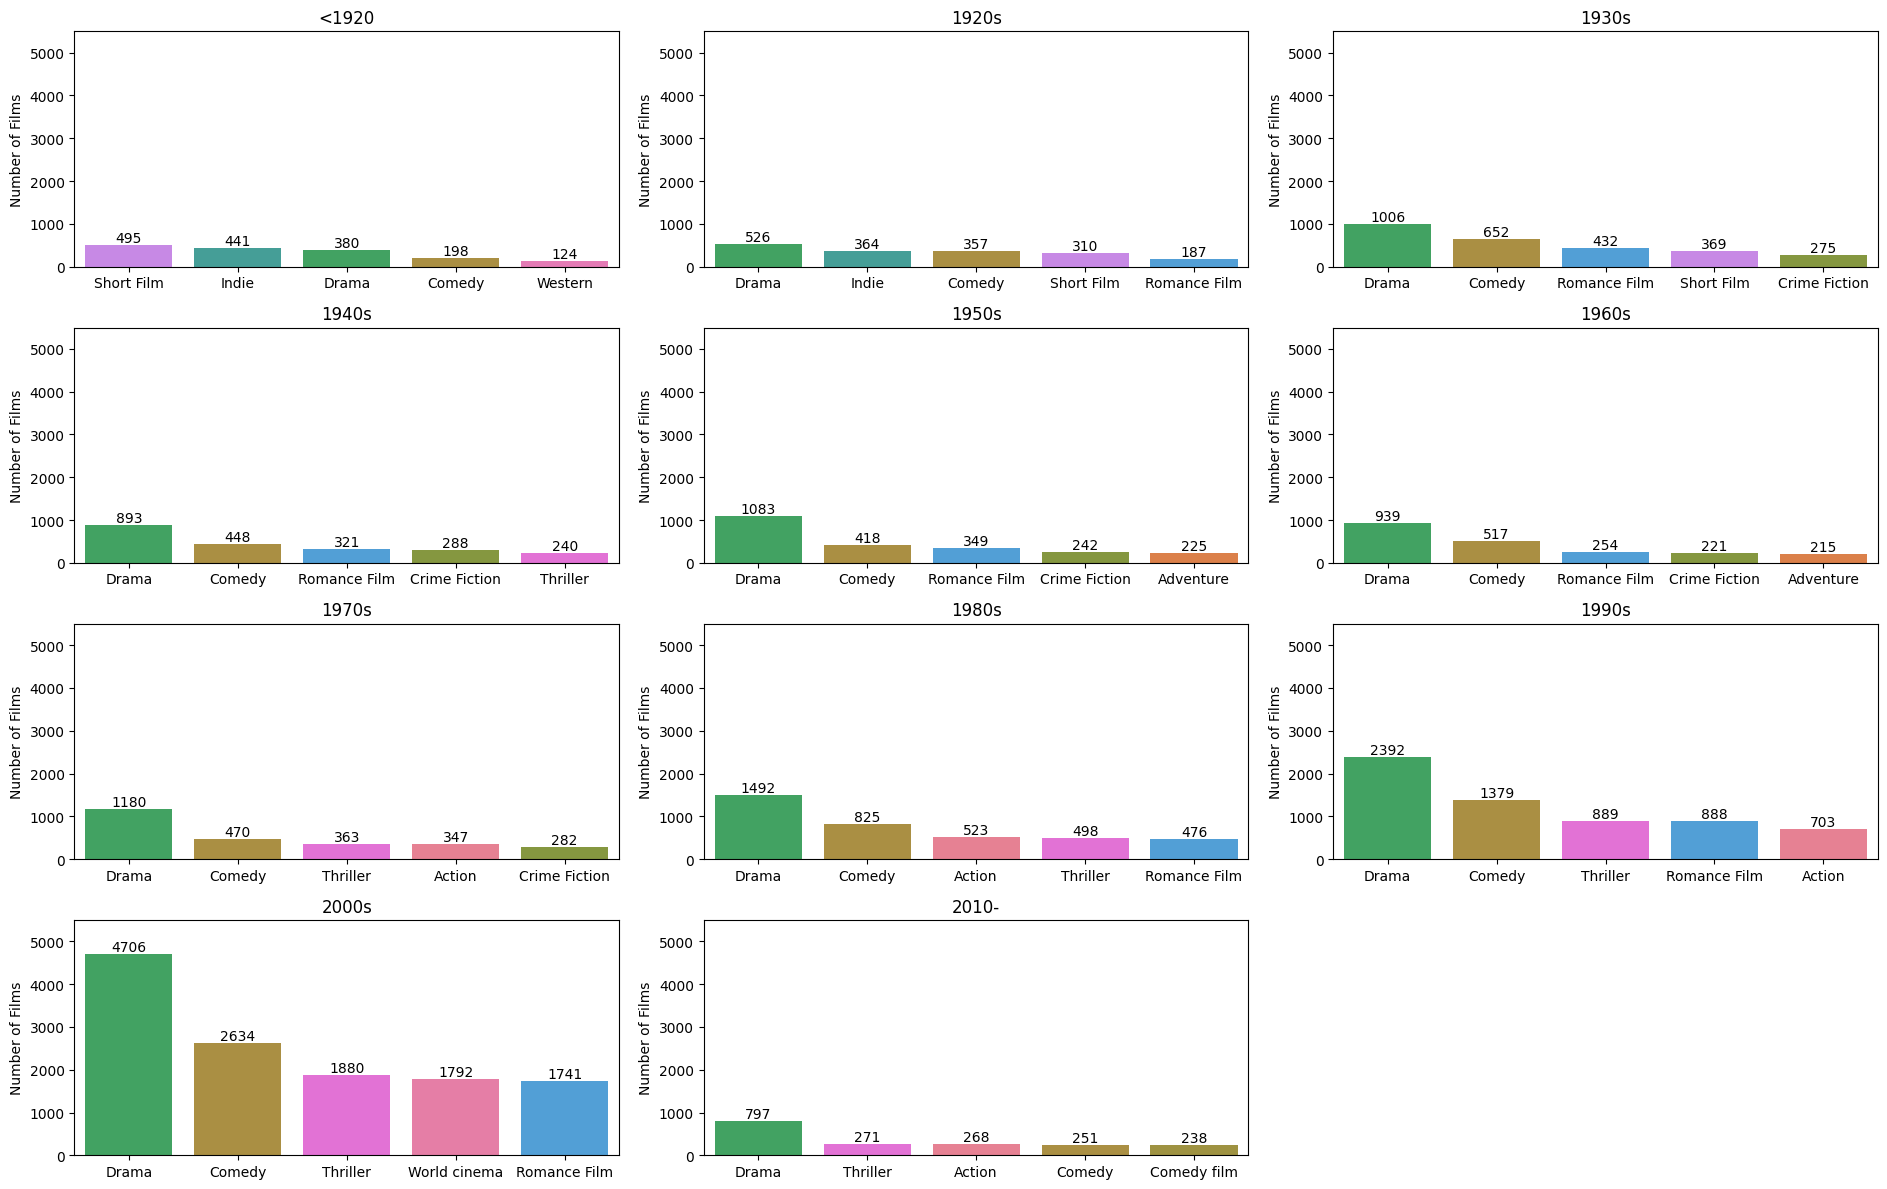

In [369]:
num_subplots = 11 

fig, axes = plt.subplots(4, 3, figsize=(19, 12))

axes = axes.flatten()

# Loop to create subplots
for i in range(num_subplots):
    
    # Extract data for each subplot
    num_films = relevant_genre_most_made_by_decade.iloc[i, 1::2].values  # Take every 2nd element starting from the 2nd one (number of films)
    film_genres = relevant_genre_most_made_by_decade.iloc[i, 0::2][:-1].values  # Exclude the decade
    
    # Create a DataFrame with genres and number of films
    df_result = pd.DataFrame(data={'Number of Films': num_films}, index=film_genres)
    
    # Create a barplot with seaborn
    ax = sns.barplot(x=film_genres, y='Number of Films', data=df_result, palette=color_mapping, ax=axes[i])

    # Set the upper limit of the y-axis to 5000
    axes[i].set_ylim(0, 5500)
    axes[i].set_title(relevant_genre_most_made_by_decade.iloc[i, -1])
    
    # Add labels to the bars
    for container in ax.containers:
        ax.bar_label(container)

# Hide empty axes if any
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


### Movie revenues: business aspect

- For this part of data visualisation, we'll have to clean up our dataset because we're probably missing some revenue data.

- We're going to delete movies that have a NaN value for the "Revenue" feature.

In [370]:
cleaned_movie_data_year_revenue = cleaned_movie_data_year.copy()

#printing  number of movies before droping NaN values for revenue
print("number of movies before droping NaN values for revenue")
print(len(cleaned_movie_data_year_revenue))

# Remove rows with NaN values in the "Revenue" column
cleaned_movie_data_year_revenue = cleaned_movie_data_year_revenue.dropna(subset=['Revenue'])

# Reindex the DataFrame after removing the rows
cleaned_movie_data_year_revenue = cleaned_movie_data_year_revenue.reset_index(drop=True)

#printing  number of movies after droping NaN values for revenue
print("number of movies after droping NaN values for revenue")
print(len(cleaned_movie_data_year_revenue))

number of movies before droping NaN values for revenue
32590
number of movies after droping NaN values for revenue
10462


Because of this cleaning, we will drop some data so it is interesting to see how many data we dropped doing this operation:

- The problem is that the CPI can only take into account data after 1913.

- However, our data set starts from 1897

- We now need to look at how many movies we would be prepared to throw away in order to compute inflation.

In [371]:
# Create another dataframe that will take inflation in account
cleaned_movie_data_year_revenus_inflation = cleaned_movie_data_year_revenue.copy()

#We're going to stop both of the dataframe before 1913 to be sure to have the same revenue data 

cleaned_movie_data_year_revenus_inflation = cleaned_movie_data_year_revenus_inflation[cleaned_movie_data_year_revenus_inflation['Release date'].dt.year >= 1913]


# Add  new column with revenue_adjusted with the inflation rate 
cleaned_movie_data_year_revenus_inflation['revenue_adjusted'] = cleaned_movie_data_year_revenus_inflation.apply(lambda x: cpi.inflate(x['Revenue'], x['year']), axis=1)

cleaned_movie_data_year_revenus_inflation

,Unnamed: 0,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations,year,Decade,revenue_adjusted
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,...",4.9,0.0,2.0,2001,2000s,2.315268e+07
1,3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Musical, Comedy, Black-and-white]",6.9,1.0,6.0,1938,1930s,7.472043e+07
2,5,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[War film, Period piece, Drama]",7.5,12.0,13.0,1989,1980s,2.398142e+07
3,6,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Musical, Fantasy, Comedy, Drama, Family Film]",7.8,22.0,17.0,1964,1960s,9.655040e+08
4,7,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Indie, Fantasy, Dr...",5.1,2.0,2.0,1999,1990s,3.780449e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,39349,1673588,/m/05mc7l,The Brother from Another Planet,1984-09-07,3677209.0,104.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America""}","[Science Fiction, Indie, Drama, Comedy, Romanc...",6.8,3.0,1.0,1984,1980s,1.035759e+07
10458,39354,23613845,/m/06zqzm0,The Trial,2009-07-08,93533.0,72.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland""}",[Documentary],7.7,2.0,2.0,2009,2000s,1.275906e+05
10459,39360,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...",[Comedy],6.7,7.0,8.0,2000,1990s,1.180217e+07
10460,39361,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","[Thriller, Crime Thriller]",5.7,1.0,1.0,1993,1990s,4.635133e+07


Let's analyse total revenue per decade:

In [372]:
# Group by decade and calculate revenues
revenues_by_decade = cleaned_movie_data_year_revenus_inflation.groupby('Decade')['Revenue'].sum()

revenues_by_decade_inflation = cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum()


Let's now compare these revenue whlie we apply inflation rate and when we don't:

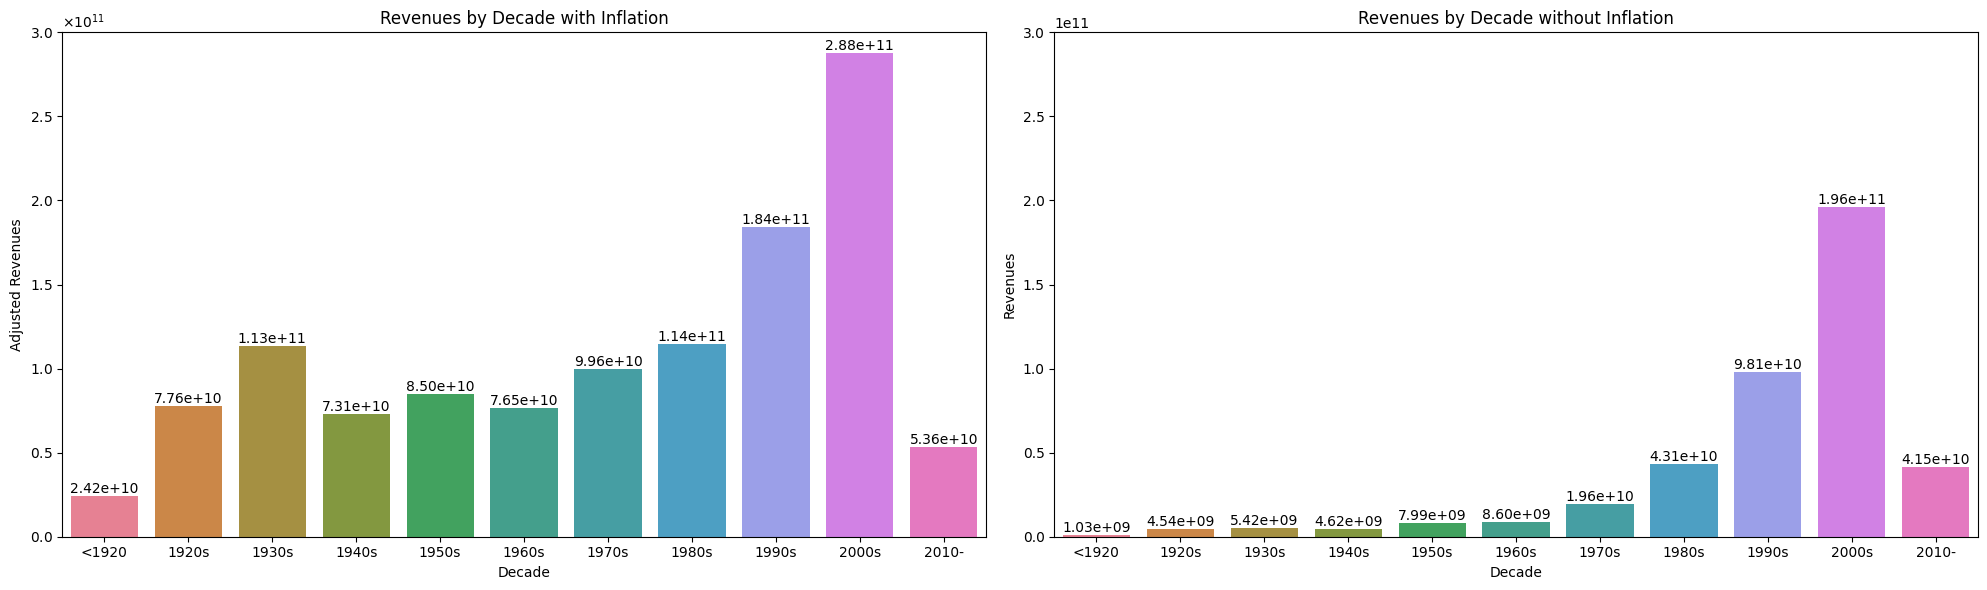

In [373]:
from matplotlib.ticker import ScalarFormatter

# Group by decade and calculate revenues (with inflation)
Revenues_by_decade_inflation = cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].sum().reset_index()

# Choose a color palette for the decades
palette_colors_inflation = sns.color_palette("husl", n_colors=len(Revenues_by_decade_inflation))

# Convert to DataFrame
Revenues_by_decade_inflation_df = pd.DataFrame(Revenues_by_decade_inflation)

# Group by decade and calculate revenues (without inflation)
Revenues_by_decade = cleaned_movie_data_year_revenus_inflation.groupby('Decade')['Revenue'].sum().reset_index()

# Choose a color palette for the decades
palette_colors = sns.color_palette("husl", n_colors=len(Revenues_by_decade))

# Convert to DataFrame
Revenues_by_decade_df = pd.DataFrame(Revenues_by_decade)

# Create a figure and axes using subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First plot (with inflation)
ax2 = sns.barplot(x='Decade', y='revenue_adjusted', data=Revenues_by_decade_inflation_df, palette=palette_colors_inflation, ax=axes[0])
ax2.set_title('Revenues by Decade with Inflation')
ax2.set_xlabel('Decade')
ax2.set_ylabel('Adjusted Revenues')
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

# Add labels on bars in scientific notation
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2e', label_type='edge')

# Second plot (without inflation)
ax1 = sns.barplot(x='Decade', y='Revenue', data=Revenues_by_decade_df, palette=palette_colors, ax=axes[1])
ax1.set_title('Revenues by Decade without Inflation')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Revenues')
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2e', label_type='edge')

# Set the same y-axis limits for both subplots
ylim_max = 3e11
ax1.set_ylim(0, ylim_max)
ax2.set_ylim(0, ylim_max)

# Show the figure
plt.tight_layout()
plt.show()


We now want to look again at the revenues of the different genres:

In [374]:
# Create explode of result_cleaned_movie_data_year_inflation_revenues to get all types and revenues of inflation
cleaned_movie_data_year_revenus_inflation_genre = cleaned_movie_data_year_revenus_inflation.explode('Genres')

cleaned_movie_data_year_revenus_inflation_genre

# create the pivot table
revenu_by_genre_by_decade= cleaned_movie_data_year_revenus_inflation_genre.pivot_table(index='Decade', columns='Genres', values='Revenue', aggfunc='sum')

revenu_by_genre_by_decade_inflation = cleaned_movie_data_year_revenus_inflation_genre.pivot_table(index='Decade', columns='Genres', values='revenue_adjusted', aggfunc='sum')

# replace the NaN values with zero
revenu_by_genre_by_decade_inflation = revenu_by_genre_by_decade_inflation.fillna(0)

revenu_by_genre_by_decade_inflation

Genres,Action,Action/Adventure,Adventure,Animation,Black-and-white,Comedy,Comedy film,Comedy-drama,Crime Fiction,Crime Thriller,...,Romance Film,Romantic comedy,Romantic drama,Science Fiction,Short Film,Silent film,Thriller,War film,Western,World cinema
Decade,,,,,,,,,,,,,,,,,,,,,
<1920,0.000000e+00,0.000000e+00,6.710253e+08,0.000000e+00,2.313388e+10,4.458473e+09,6.062449e+08,0.000000e+00,1.418396e+06,0.000000e+00,...,2.946234e+08,0.000000e+00,0.000000e+00,0.000000e+00,7.382975e+09,2.407376e+10,1.289292e+05,0.000000e+00,2.872357e+09,1.289292e+05
1920s,4.616488e+09,2.208146e+09,4.362227e+09,1.012900e+09,3.337372e+10,9.628593e+09,2.829211e+08,2.988712e+09,5.927354e+09,9.128548e+09,...,7.464152e+09,5.238588e+08,3.339308e+09,8.784387e+07,1.722967e+10,5.693808e+10,9.217910e+09,5.770927e+09,5.575013e+07,8.981241e+07
1930s,1.393701e+10,9.602448e+09,2.387384e+10,1.723118e+10,6.547684e+10,4.538356e+09,7.723563e+08,9.488186e+07,5.999176e+08,4.136873e+07,...,2.692970e+10,7.427554e+08,1.106553e+10,2.339443e+09,4.330628e+08,0.000000e+00,3.635483e+09,1.309977e+10,5.007496e+09,3.251248e+09
1940s,1.772958e+09,9.010540e+08,8.481143e+09,6.858831e+09,3.876544e+10,1.718384e+10,1.287963e+08,2.261937e+08,6.013340e+09,1.211444e+09,...,2.110787e+10,1.386584e+10,1.435454e+09,6.071680e+07,7.696343e+09,0.000000e+00,3.785247e+09,1.393451e+09,4.417188e+08,1.153807e+10
1950s,1.638157e+10,1.716331e+10,1.204926e+10,6.274842e+09,2.329375e+10,1.209348e+10,9.544819e+08,1.110096e+09,8.602099e+09,3.078664e+09,...,2.467945e+10,2.487594e+09,1.142025e+10,6.040302e+09,4.128163e+09,0.000000e+00,5.046300e+09,2.926012e+09,3.967916e+09,7.951842e+09
1960s,1.874633e+10,1.523091e+10,1.229036e+10,7.388658e+09,9.002403e+09,1.839740e+10,2.724028e+08,5.480094e+09,7.391425e+09,1.958962e+09,...,2.133477e+10,4.052269e+09,8.871307e+09,2.815638e+09,4.285937e+09,0.000000e+00,1.317574e+10,5.466247e+09,4.473484e+09,1.355893e+09
1970s,3.077723e+10,2.037419e+10,2.323048e+10,3.437940e+09,1.256248e+09,3.004395e+10,1.163078e+09,3.798441e+09,1.662984e+10,4.017185e+09,...,1.918028e+10,5.516797e+09,4.870043e+09,1.572014e+10,9.974308e+08,1.859089e+08,2.407013e+10,1.625807e+09,2.258607e+09,2.483060e+09
1980s,3.684583e+10,3.298384e+10,2.891881e+10,3.897931e+09,6.316006e+07,4.946705e+10,1.281252e+09,4.594892e+09,1.806768e+10,3.704042e+09,...,2.491240e+10,9.926169e+09,8.693636e+09,1.743406e+10,4.324929e+08,0.000000e+00,2.559498e+10,5.069943e+09,2.495247e+09,2.836262e+09
1990s,6.424528e+10,4.525545e+10,4.614548e+10,1.391909e+10,6.798058e+08,7.248108e+10,2.487848e+09,1.164184e+10,3.392785e+10,1.335684e+10,...,4.439127e+10,1.794733e+10,1.693836e+10,2.630710e+10,1.771054e+09,0.000000e+00,6.900636e+10,1.025981e+10,3.285952e+09,2.568563e+09


Now, let us plot the revenues by genre (adjusted and not adjusted for inflation):

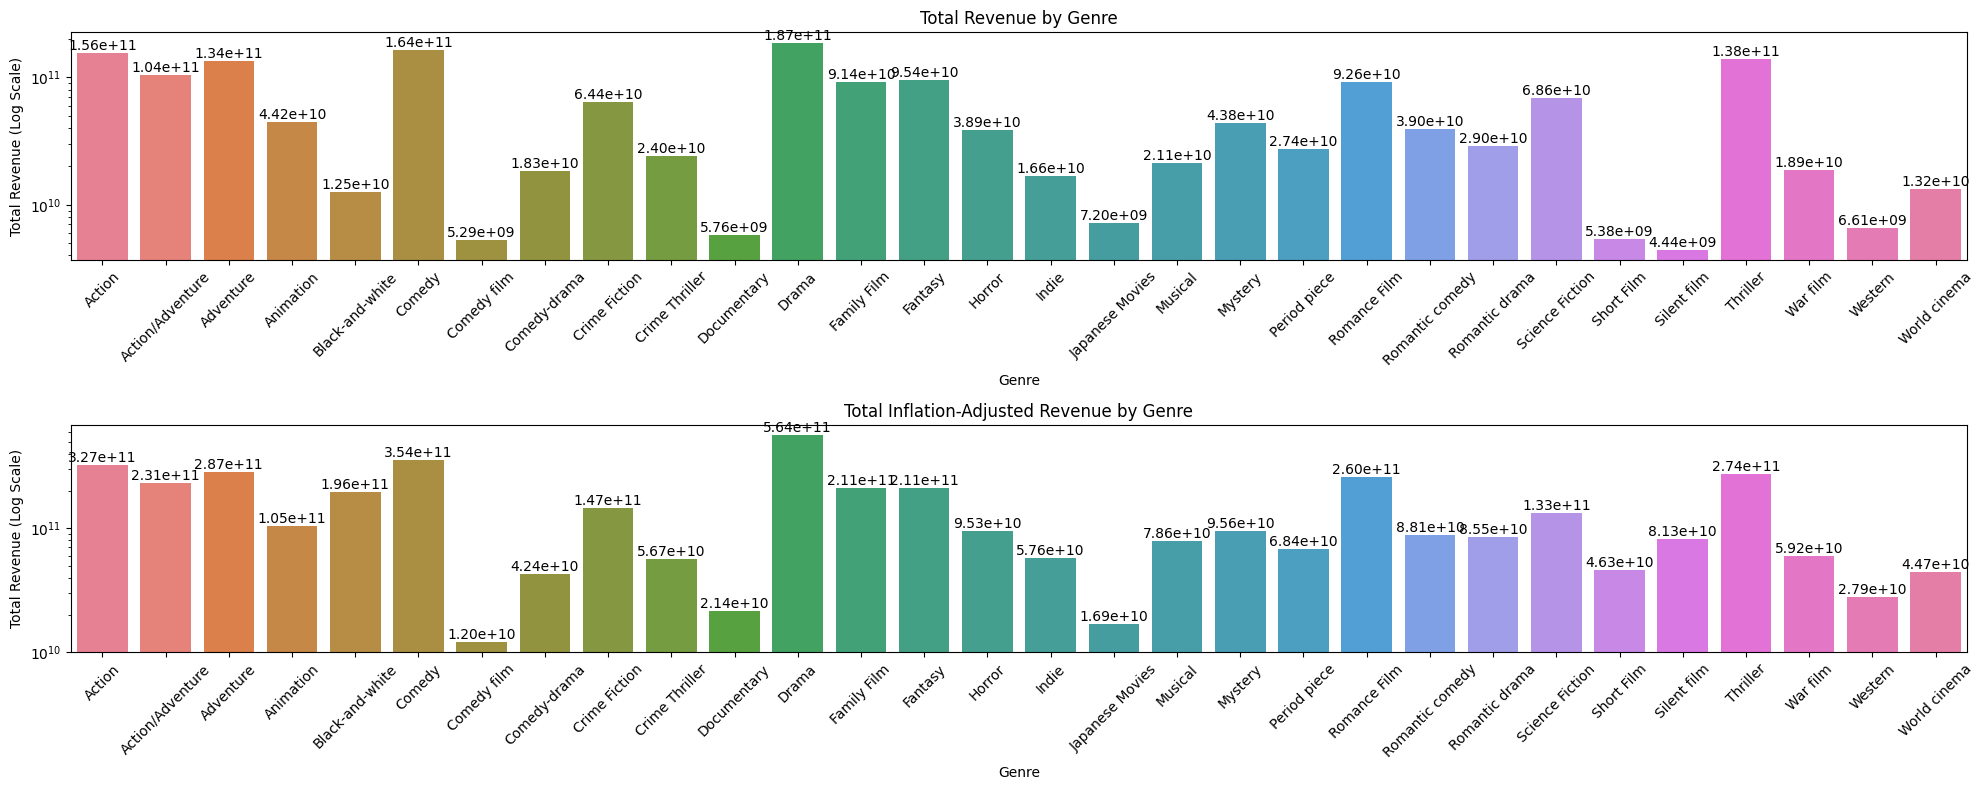

In [375]:
# Group by genre and calculate total revenues for both datasets
df_grouped = cleaned_movie_data_year_revenus_inflation_genre.groupby('Genres')['Revenue'].sum().reset_index()
df_grouped_inflation = cleaned_movie_data_year_revenus_inflation_genre.groupby('Genres')['revenue_adjusted'].sum().reset_index()

# Plot using Seaborn
fig, axes = plt.subplots(2, 1, figsize=(20, 8))

# Subplot 1: Total Revenue by Genre
ax1 = sns.barplot(x='Genres', y='Revenue', data=df_grouped, palette=color_mapping, ax=axes[0])
ax1.set_yscale('log')  # Use log scale for better visualization of large differences
ax1.set_title('Total Revenue by Genre')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Total Revenue (Log Scale)')
ax1.tick_params(axis='x', rotation=45)  # Adjust the rotation here
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.2e', label_type='edge')

# Subplot 2: Total Inflation-Adjusted Revenue by Genre
ax2 = sns.barplot(x='Genres', y='revenue_adjusted', data=df_grouped_inflation, palette=color_mapping, ax=axes[1])
ax2.set_yscale('log')  # Use log scale for better visualization of large differences
ax2.set_title('Total Inflation-Adjusted Revenue by Genre')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Total Revenue (Log Scale)')
ax2.tick_params(axis='x', rotation=45)  # Adjust the rotation here
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2e', label_type='edge')
    
# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()



Now, we will prepare some data for a heatmap which will display the relationship between 15 movie genres that generate the most revenue and the decade:

In [376]:
# Reset the index if it is a multi-level index
revenu_by_genre_by_decade_inflation.reset_index(inplace=True)

# Set 'Decade' as the index
revenu_by_genre_by_decade_inflation.set_index('Decade', inplace=True)

# Calculate total revenue for each genre
total_revenue_by_genre_inflation = revenu_by_genre_by_decade_inflation.sum(axis=0)

# Sort genres by total revenue in descending order
sorted_genres_inflation = total_revenue_by_genre_inflation.sort_values(ascending=False)

# Select the top 15 genres
top_15_genres_inflation = sorted_genres_inflation.head(15)

# Filter the DataFrame to keep only the top 15 genres
df_top_15_inflation = revenu_by_genre_by_decade_inflation[top_15_genres_inflation.index]


Same for non inflated data:

In [377]:
# Reset the index if it is a multi-level index
revenu_by_genre_by_decade.reset_index(inplace=True)

# Set 'Decade' as the index
revenu_by_genre_by_decade.set_index('Decade', inplace=True)

# Calculate total revenue for each genre
total_revenue_by_genre = revenu_by_genre_by_decade.sum(axis=0)

# Sort genres by total revenue in descending order
sorted_genres = total_revenue_by_genre.sort_values(ascending=False)

# Select the top 15 genres
top_15_genres = sorted_genres.head(15)

print(top_15_genres)
# Filter the DataFrame to keep only the top 15 genres
df_top_15 = revenu_by_genre_by_decade_inflation[top_15_genres.index]



Genres
Drama               1.868436e+11
Comedy              1.636386e+11
Action              1.564608e+11
Thriller            1.379375e+11
Adventure           1.335213e+11
Action/Adventure    1.041372e+11
Fantasy             9.542499e+10
Romance Film        9.256134e+10
Family Film         9.135664e+10
Science Fiction     6.863569e+10
Crime Fiction       6.444463e+10
Animation           4.421480e+10
Mystery             4.376238e+10
Romantic comedy     3.896052e+10
Horror              3.888496e+10
dtype: float64


Now for the heatmap:

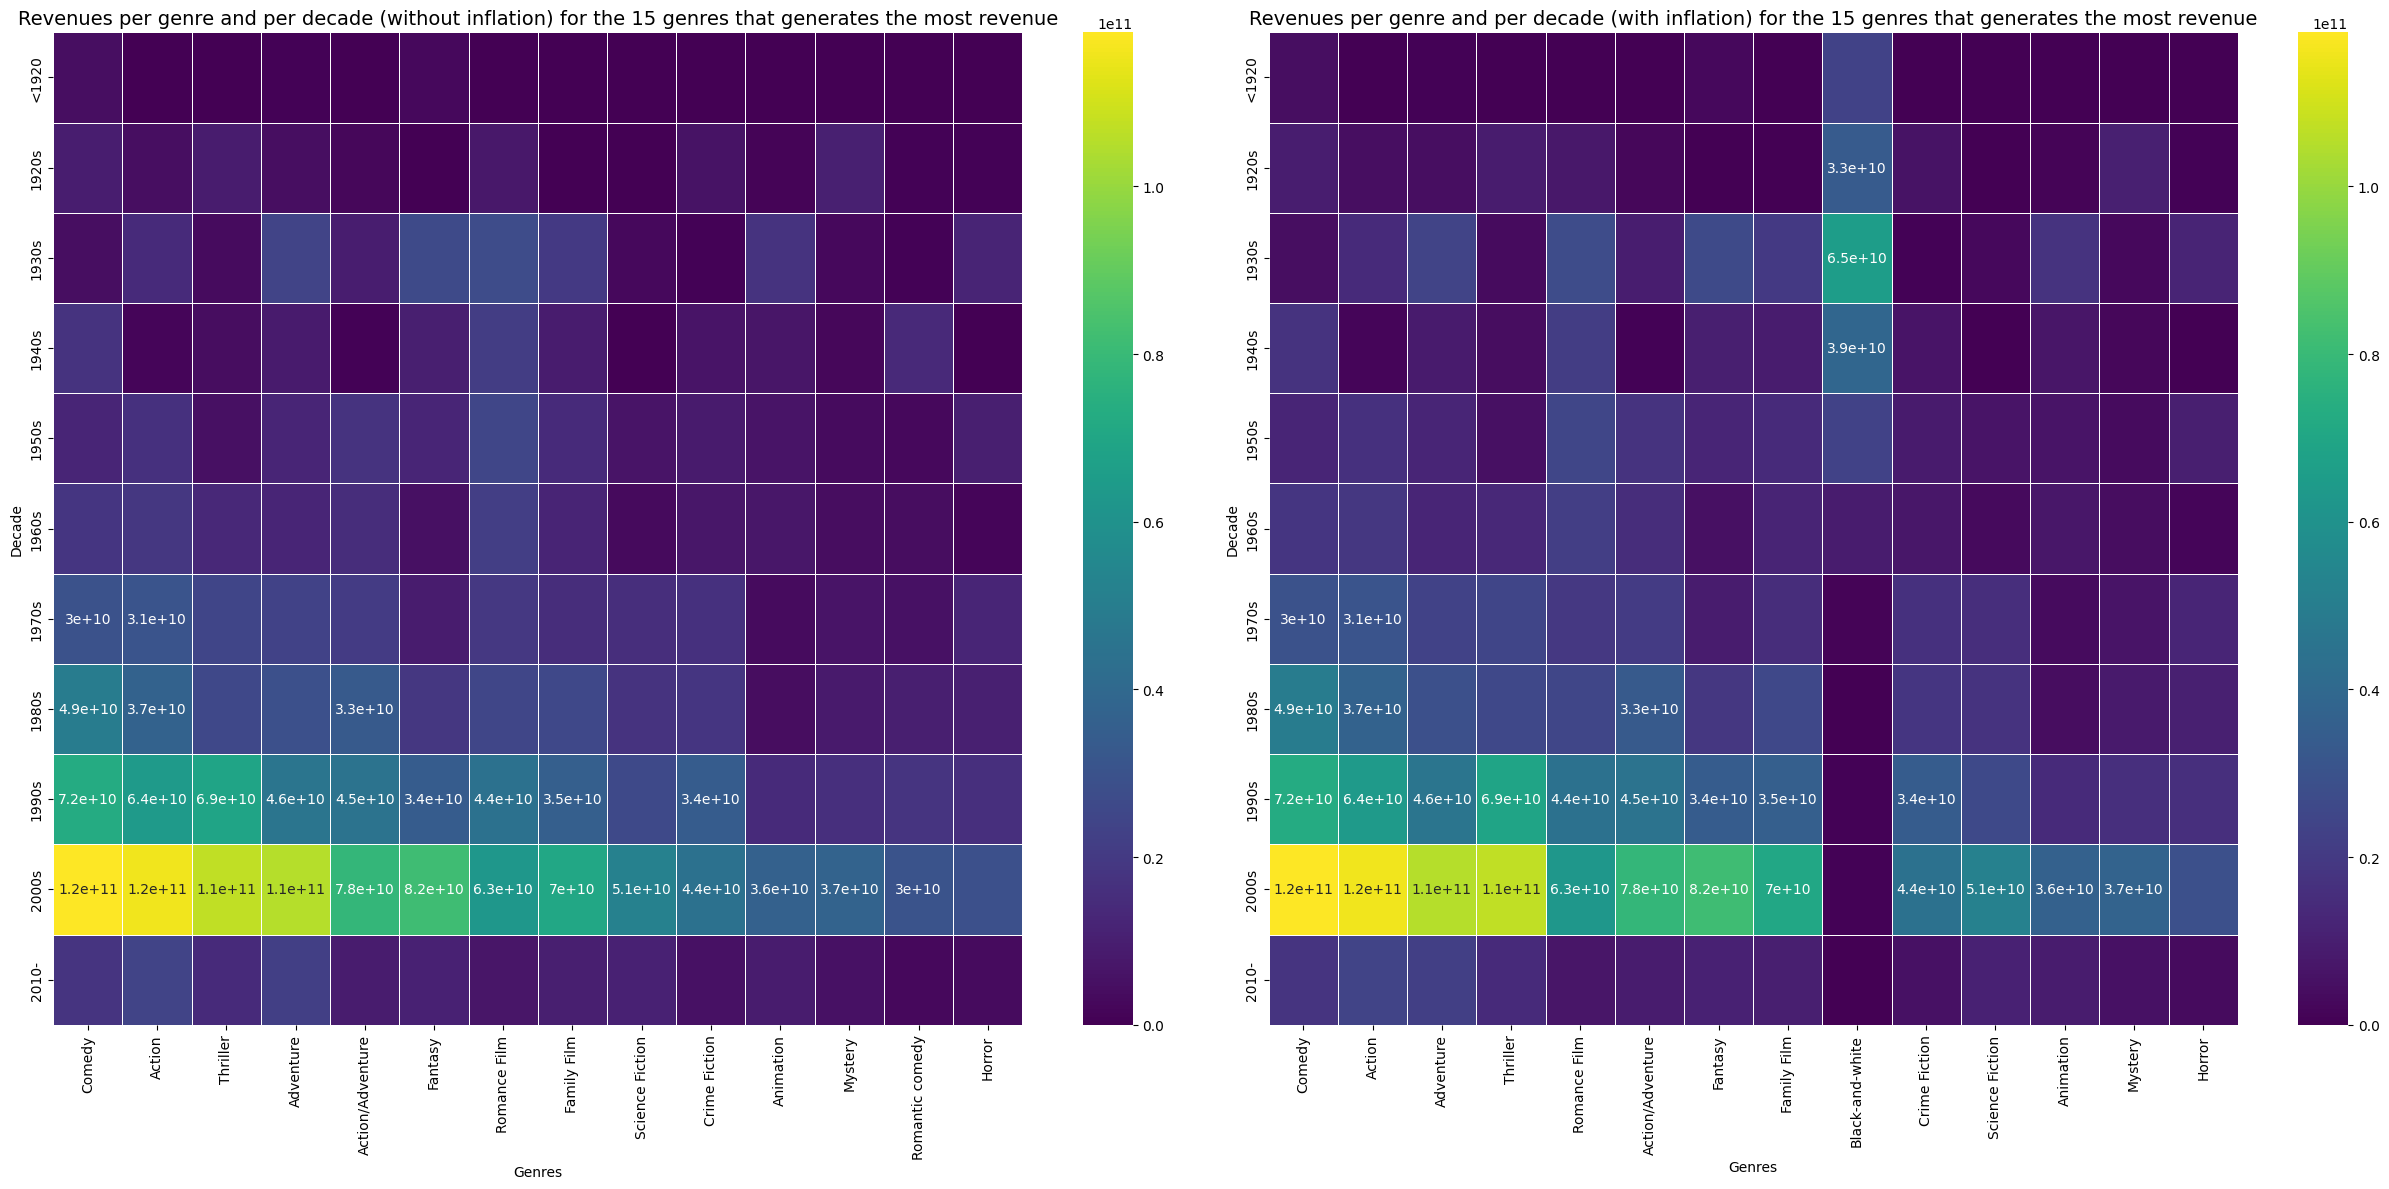

In [378]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(25, 12))  # 1 row, 2 columns

# Plot for the first DataFrame (without inflation)
heatmap2 = sns.heatmap(df_top_15.iloc[:, 1:29], annot=True, cmap='viridis', linewidths=.7, ax=axes[0])

# Add a title to the first subplot
axes[0].set_title('Revenues per genre and per decade (without inflation) for the 15 genres that generates the most revenue', fontsize=14)
# Plot for the second DataFrame (with inflation)
heatmap1 =sns.heatmap(df_top_15_inflation.iloc[:, 1:29], annot=True, cmap='viridis', linewidths=.7, ax=axes[1])

# Add a title to the second subplot
axes[1].set_title('Revenues per genre and per decade (with inflation) for the 15 genres that generates the most revenue', fontsize=14)

# Hide annotations for values below 300
for text in heatmap1.texts:
    if float(text.get_text().replace(",", "")) < 3e10:
        text.set_text("")
# Hide annotations for values below 300
for text in heatmap2.texts:
    if float(text.get_text().replace(",", "")) < 3e10:
        text.set_text("")

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


We see that, on the inflated heatmap, the black and white movies from the 1930s appear as a hotspot since they were very popular. On the non inflated heatmap, we do not see them because their revenues do not compare to the revenues of movies from the 21st century.

Now, let us take the 4 most successful genres per decade and see their cumulative revenues:

In [379]:
most_rentable_genre_by_decade_inflation = extract_top_genres(revenu_by_genre_by_decade_inflation, num_top_genres=4)
most_rentable_genre_by_decade = extract_top_genres(revenu_by_genre_by_decade, num_top_genres=4) 


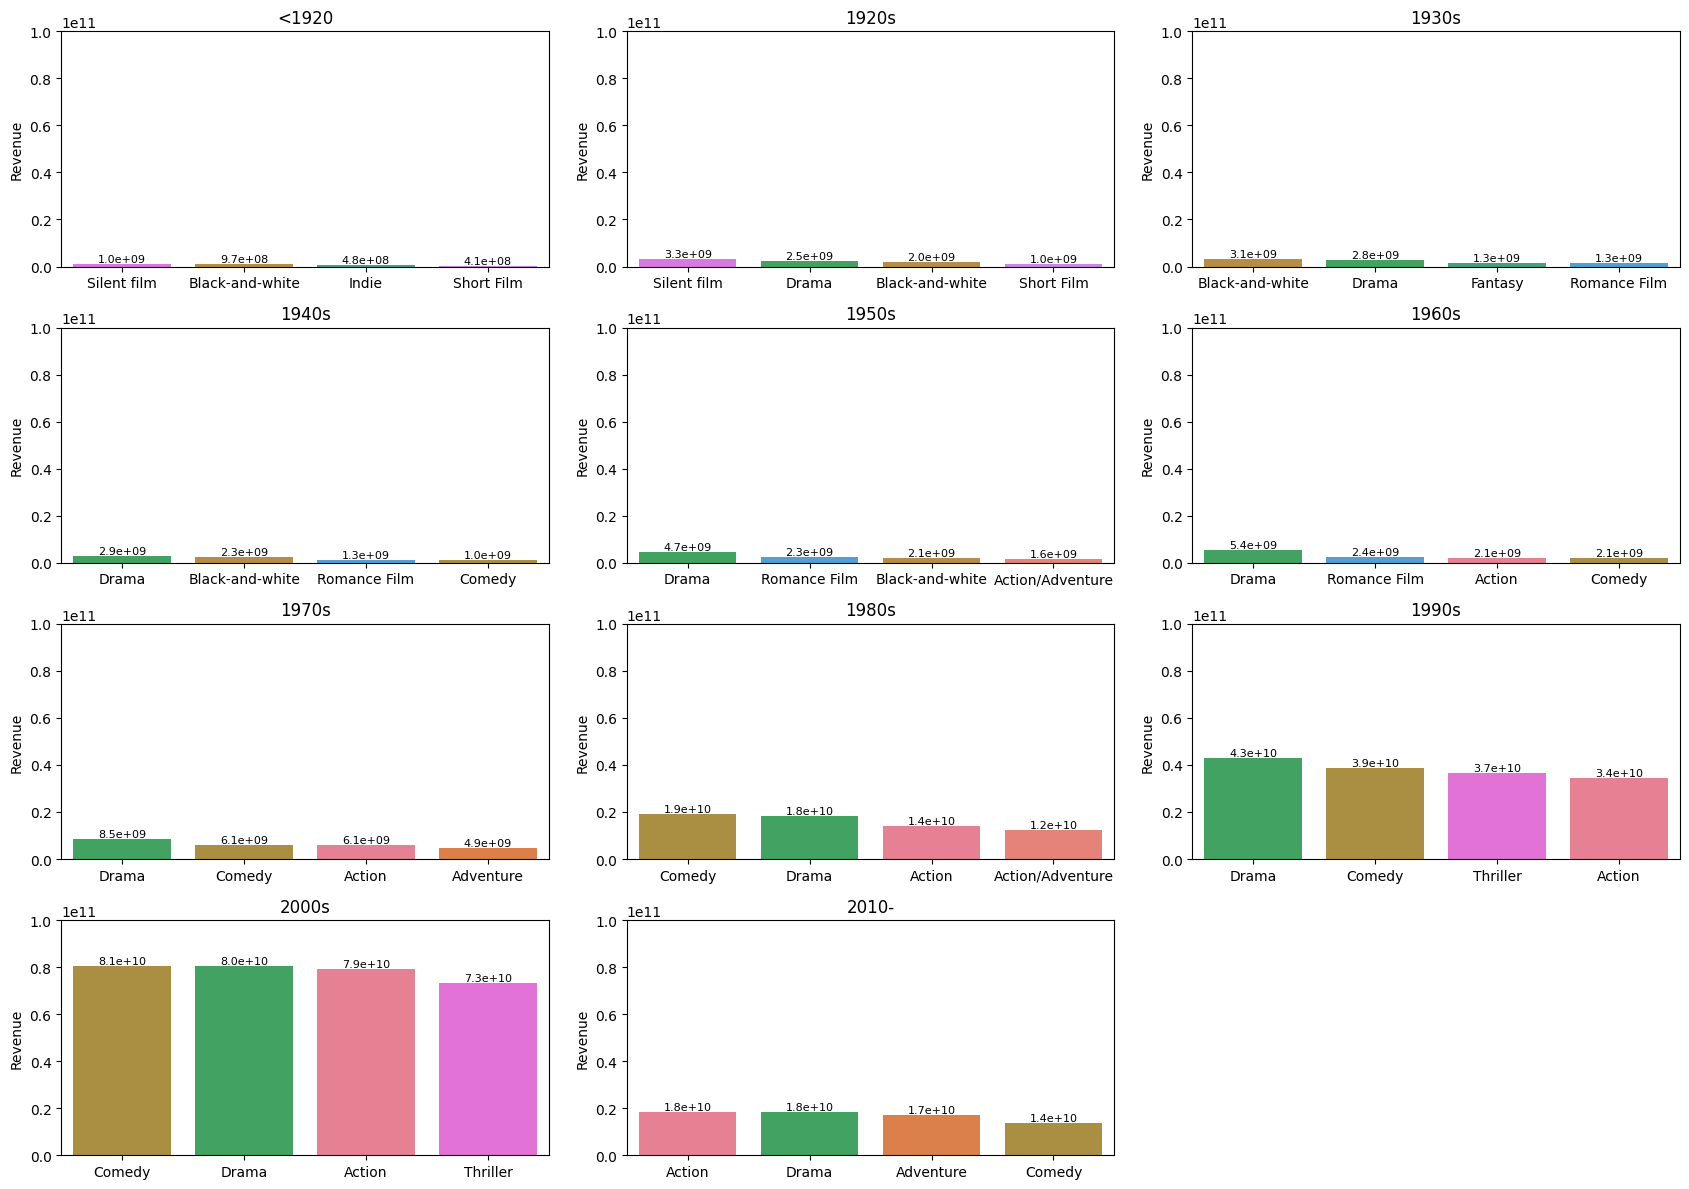

In [380]:
num_subplots = 11

fig, axes = plt.subplots(4, 3, figsize=(17, 12))

axes = axes.flatten()

for i in range(num_subplots):
    
    Revenue = most_rentable_genre_by_decade.iloc[i, 1::2].values  # take one element each 2 starting at 2 (number of movies)
    movie_genres = most_rentable_genre_by_decade.iloc[i, 0::2][:-1].values

    # create dataframe with genres and number of movies
    df_resultat = pd.DataFrame(data={'Revenue': Revenue}, index=movie_genres)
    
    # seaborn barplot
    ax = sns.barplot(x=movie_genres, y='Revenue', data=df_resultat, palette=color_mapping, ax=axes[i])

    axes[i].set_title(most_rentable_genre_by_decade.iloc[i, -1])

    ax.set(ylim=(0, 10e10))
    
    # annotate with scientific notation
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1e', fontsize=8, color='black', label_type='edge')

# mask empty axes if any
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


We perform the exaxt same thing for inflated revenues:

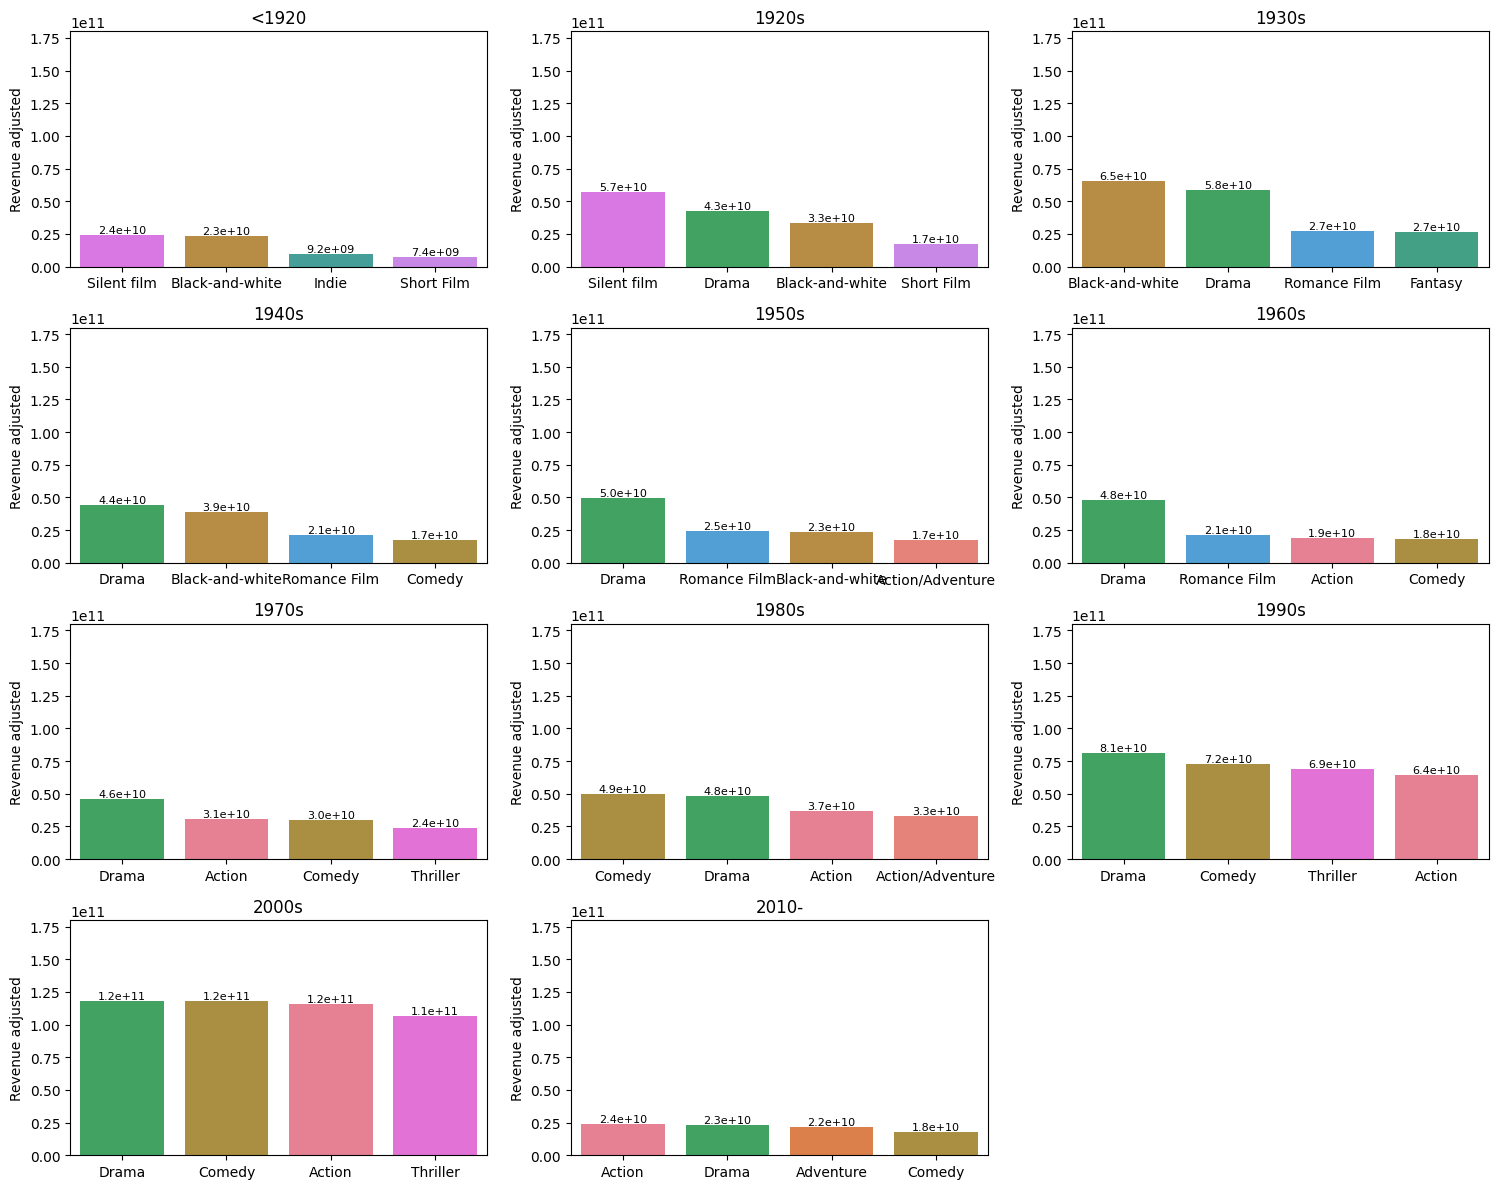

In [381]:
num_subplots = 11

fig, axes = plt.subplots(4, 3, figsize=(15, 12))

axes = axes.flatten()

for i in range(num_subplots):
    
    Revenue = most_rentable_genre_by_decade_inflation.iloc[i, 1::2].values

    Genre_de_films = most_rentable_genre_by_decade_inflation.iloc[i, 0::2][:-1].values

    df_resultat = pd.DataFrame(data={'Revenue adjusted': Revenue}, index=Genre_de_films)
    
    ax = sns.barplot(x=Genre_de_films, y='Revenue adjusted', data=df_resultat, palette=color_mapping, ax=axes[i])

    axes[i].set_title(most_rentable_genre_by_decade_inflation.iloc[i, -1])

    ax.set(ylim=(0, 18e10))
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1e', fontsize=8, color='black', label_type='edge')


for i in range(num_subplots, len(axes)):
    axes[i].axis('off')
    
plt.tight_layout()

plt.show()


We can remove the silent films and black and white films to see how the top genres evolve, especially for the early decades:

In [382]:
# Remove the columns "Black-and-white" and "Silent film"
revenu_by_relevant_genres_by_decade = revenu_by_genre_by_decade.copy()

revenu_by_relevant_genres_by_decade_inflation = revenu_by_genre_by_decade_inflation.copy()

# Drop the columns "Black-and-white" and "Silent film"
revenu_by_relevant_genres_by_decade = revenu_by_relevant_genres_by_decade.drop(columns=["Black-and-white", "Silent film"], errors='ignore')

revenu_by_relevant_genres_by_decade_inflation = revenu_by_relevant_genres_by_decade_inflation.drop(columns=["Black-and-white", "Silent film"], errors='ignore')


revenu_relevant_genre_most_made_by_decade = extract_top_genres(revenu_by_relevant_genres_by_decade, num_top_genres=4)
revenu_relevant_genre_most_made_by_decade_inflation = extract_top_genres(revenu_by_relevant_genres_by_decade_inflation, num_top_genres=4)


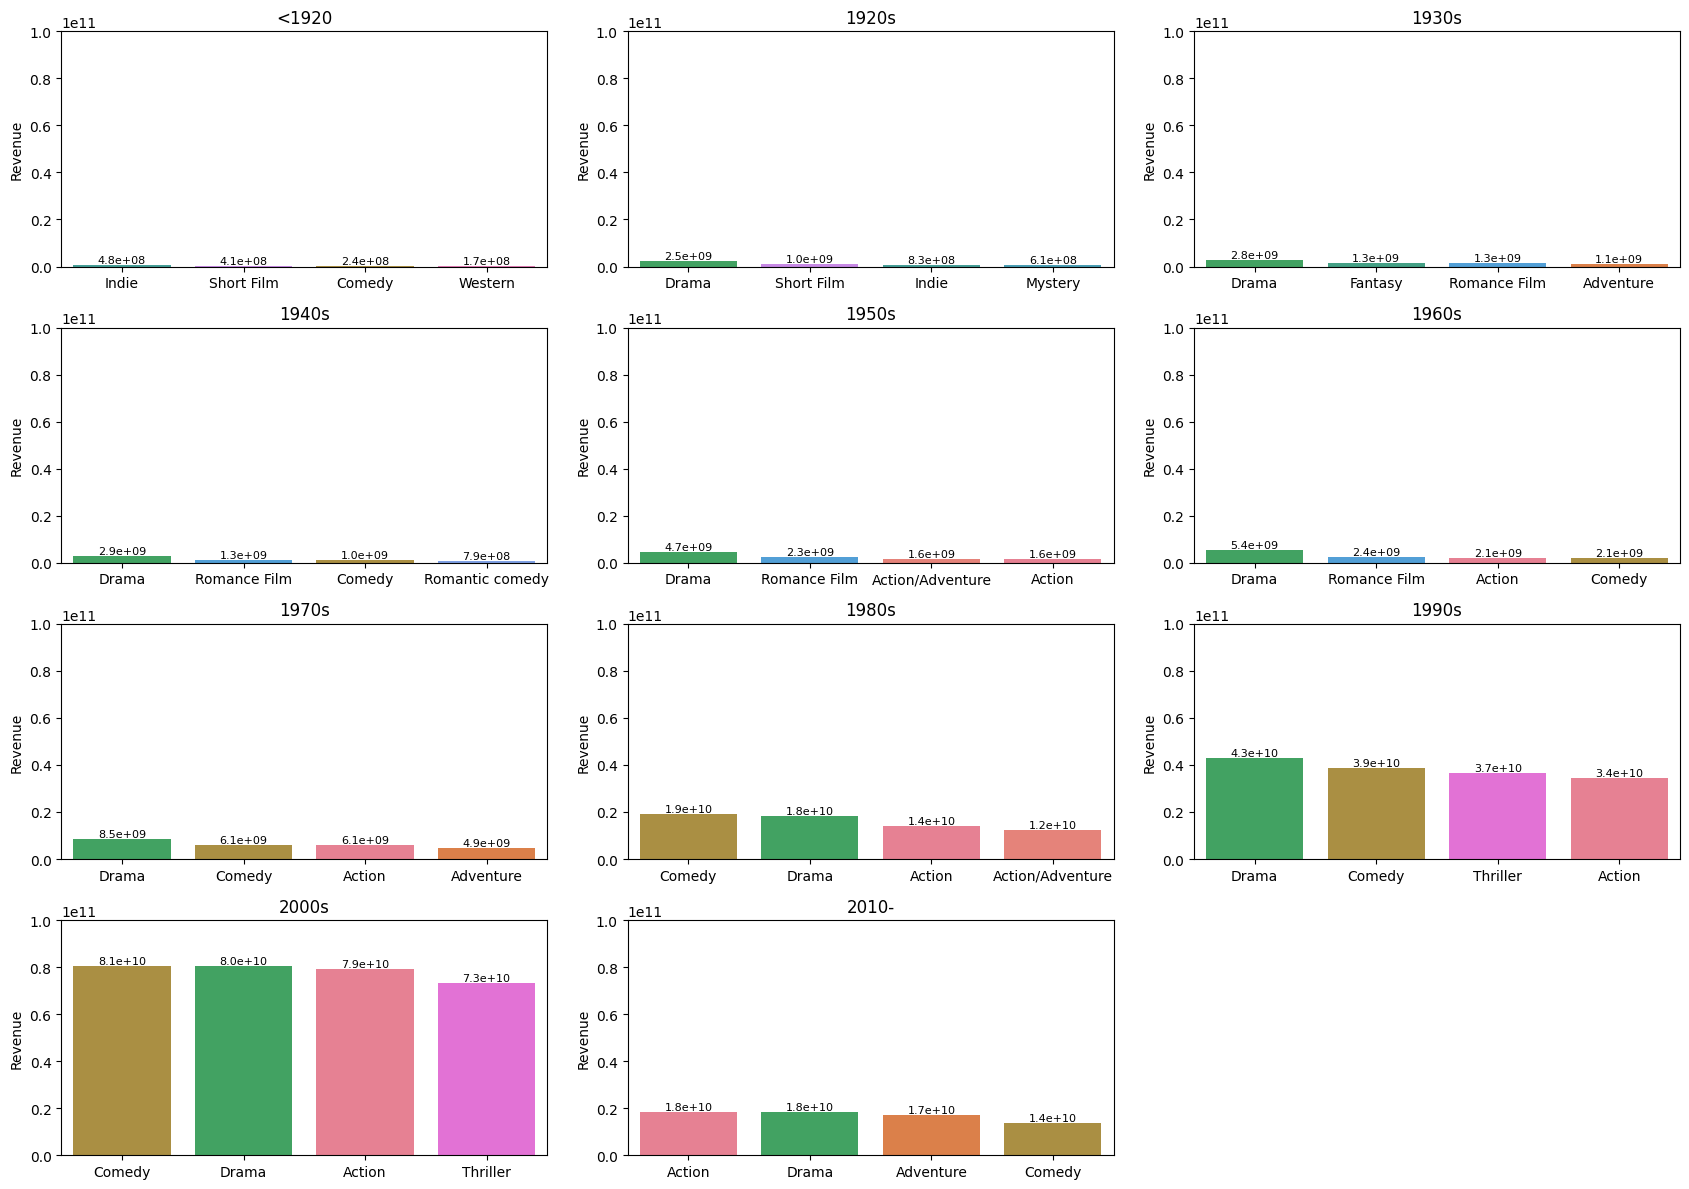

In [383]:
num_subplots = 11

fig, axes = plt.subplots(4, 3, figsize=(17, 12))

axes = axes.flatten()

for i in range(num_subplots):
    
    Revenue = revenu_relevant_genre_most_made_by_decade.iloc[i, 1::2].values  
    Genre_de_films = revenu_relevant_genre_most_made_by_decade.iloc[i, 0::2][:-1].values 

    df_resultat = pd.DataFrame(data={'Revenue': Revenue}, index=Genre_de_films)
    
    ax = sns.barplot(x=Genre_de_films, y='Revenue', data=df_resultat, palette=color_mapping, ax=axes[i])

    axes[i].set_title(most_rentable_genre_by_decade.iloc[i, -1])

    ax.set(ylim=(0, 10e10))
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1e', fontsize=8, color='black', label_type='edge')


for i in range(num_subplots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()

plt.show()


Now for the inflated revenues:

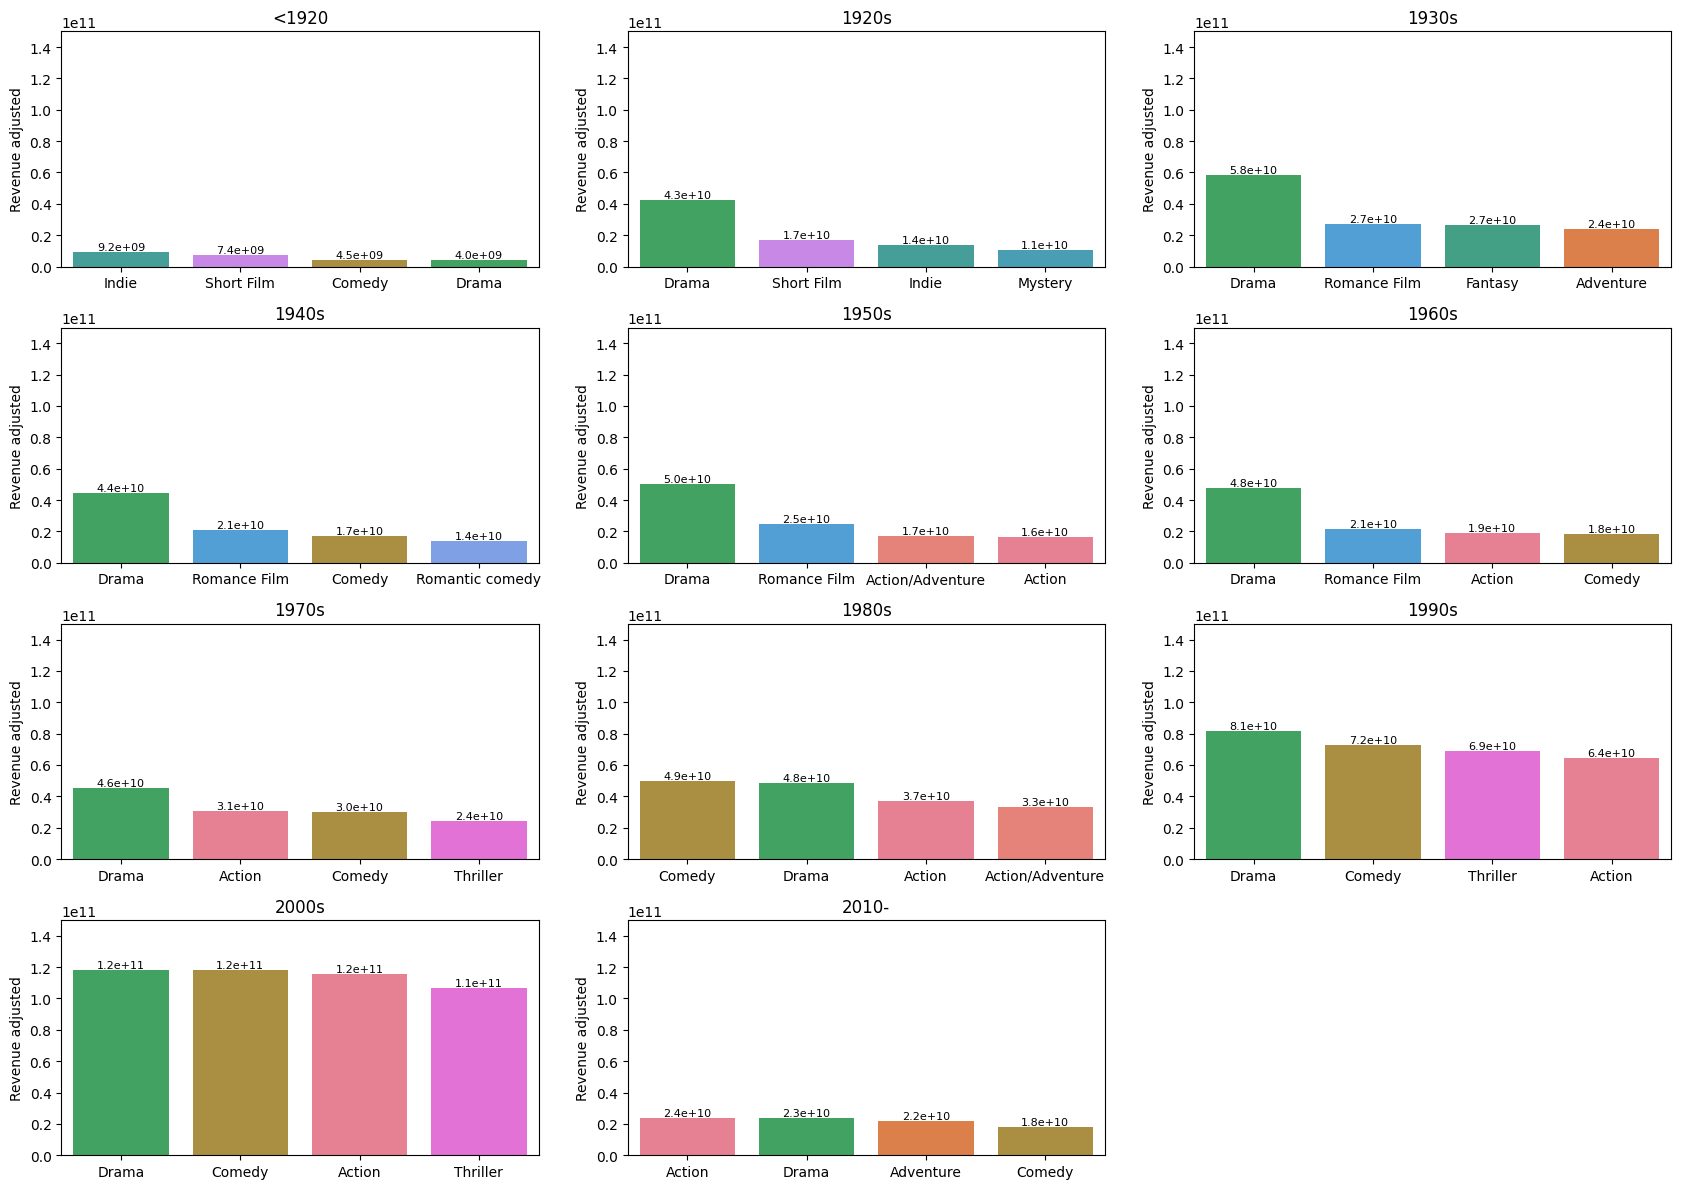

In [384]:
num_subplots = 11

fig, axes = plt.subplots(4, 3, figsize=(17, 12))

axes = axes.flatten()

for i in range(num_subplots):
    
    Revenue = revenu_relevant_genre_most_made_by_decade_inflation .iloc[i, 1::2].values 
    Genre_de_films = revenu_relevant_genre_most_made_by_decade_inflation .iloc[i, 0::2][:-1].values 

    df_resultat = pd.DataFrame(data={'Revenue adjusted': Revenue}, index=Genre_de_films)
    
    ax = sns.barplot(x=Genre_de_films, y='Revenue adjusted', data=df_resultat, palette=color_mapping, ax=axes[i])

    axes[i].set_title(revenu_relevant_genre_most_made_by_decade_inflation .iloc[i, -1])

    ax.set(ylim=(0, 15e10))
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1e', fontsize=8, color='black', label_type='edge')

for i in range(num_subplots, len(axes)):
    axes[i].axis('off')


plt.tight_layout()

plt.show()


Here, we see that the top genres have evolved.

Now, we can analyse the mean and median revenues per decade. First, we extract the data:

In [385]:
Mean_revenues_by_decade_inflation = cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].mean().reset_index()
Mean_revenues_by_decade_inflation_df = pd.DataFrame(Mean_revenues_by_decade_inflation)

Median_revenues_by_decade_inflation = cleaned_movie_data_year_revenus_inflation.groupby('Decade')['revenue_adjusted'].mean().reset_index()
Median_revenues_by_decade_inflation_df = pd.DataFrame(Median_revenues_by_decade_inflation)


Mean_revenues_by_decade= cleaned_movie_data_year_revenus_inflation.groupby('Decade')['Revenue'].mean().reset_index()
Mean_revenues_by_decade_df = pd.DataFrame(Mean_revenues_by_decade)

Median_revenues_by_decade = cleaned_movie_data_year_revenus_inflation.groupby('Decade')['Revenue'].mean().reset_index()
Median_revenues_by_decade_df = pd.DataFrame(Median_revenues_by_decade)

Now, we make 4 bar plots:

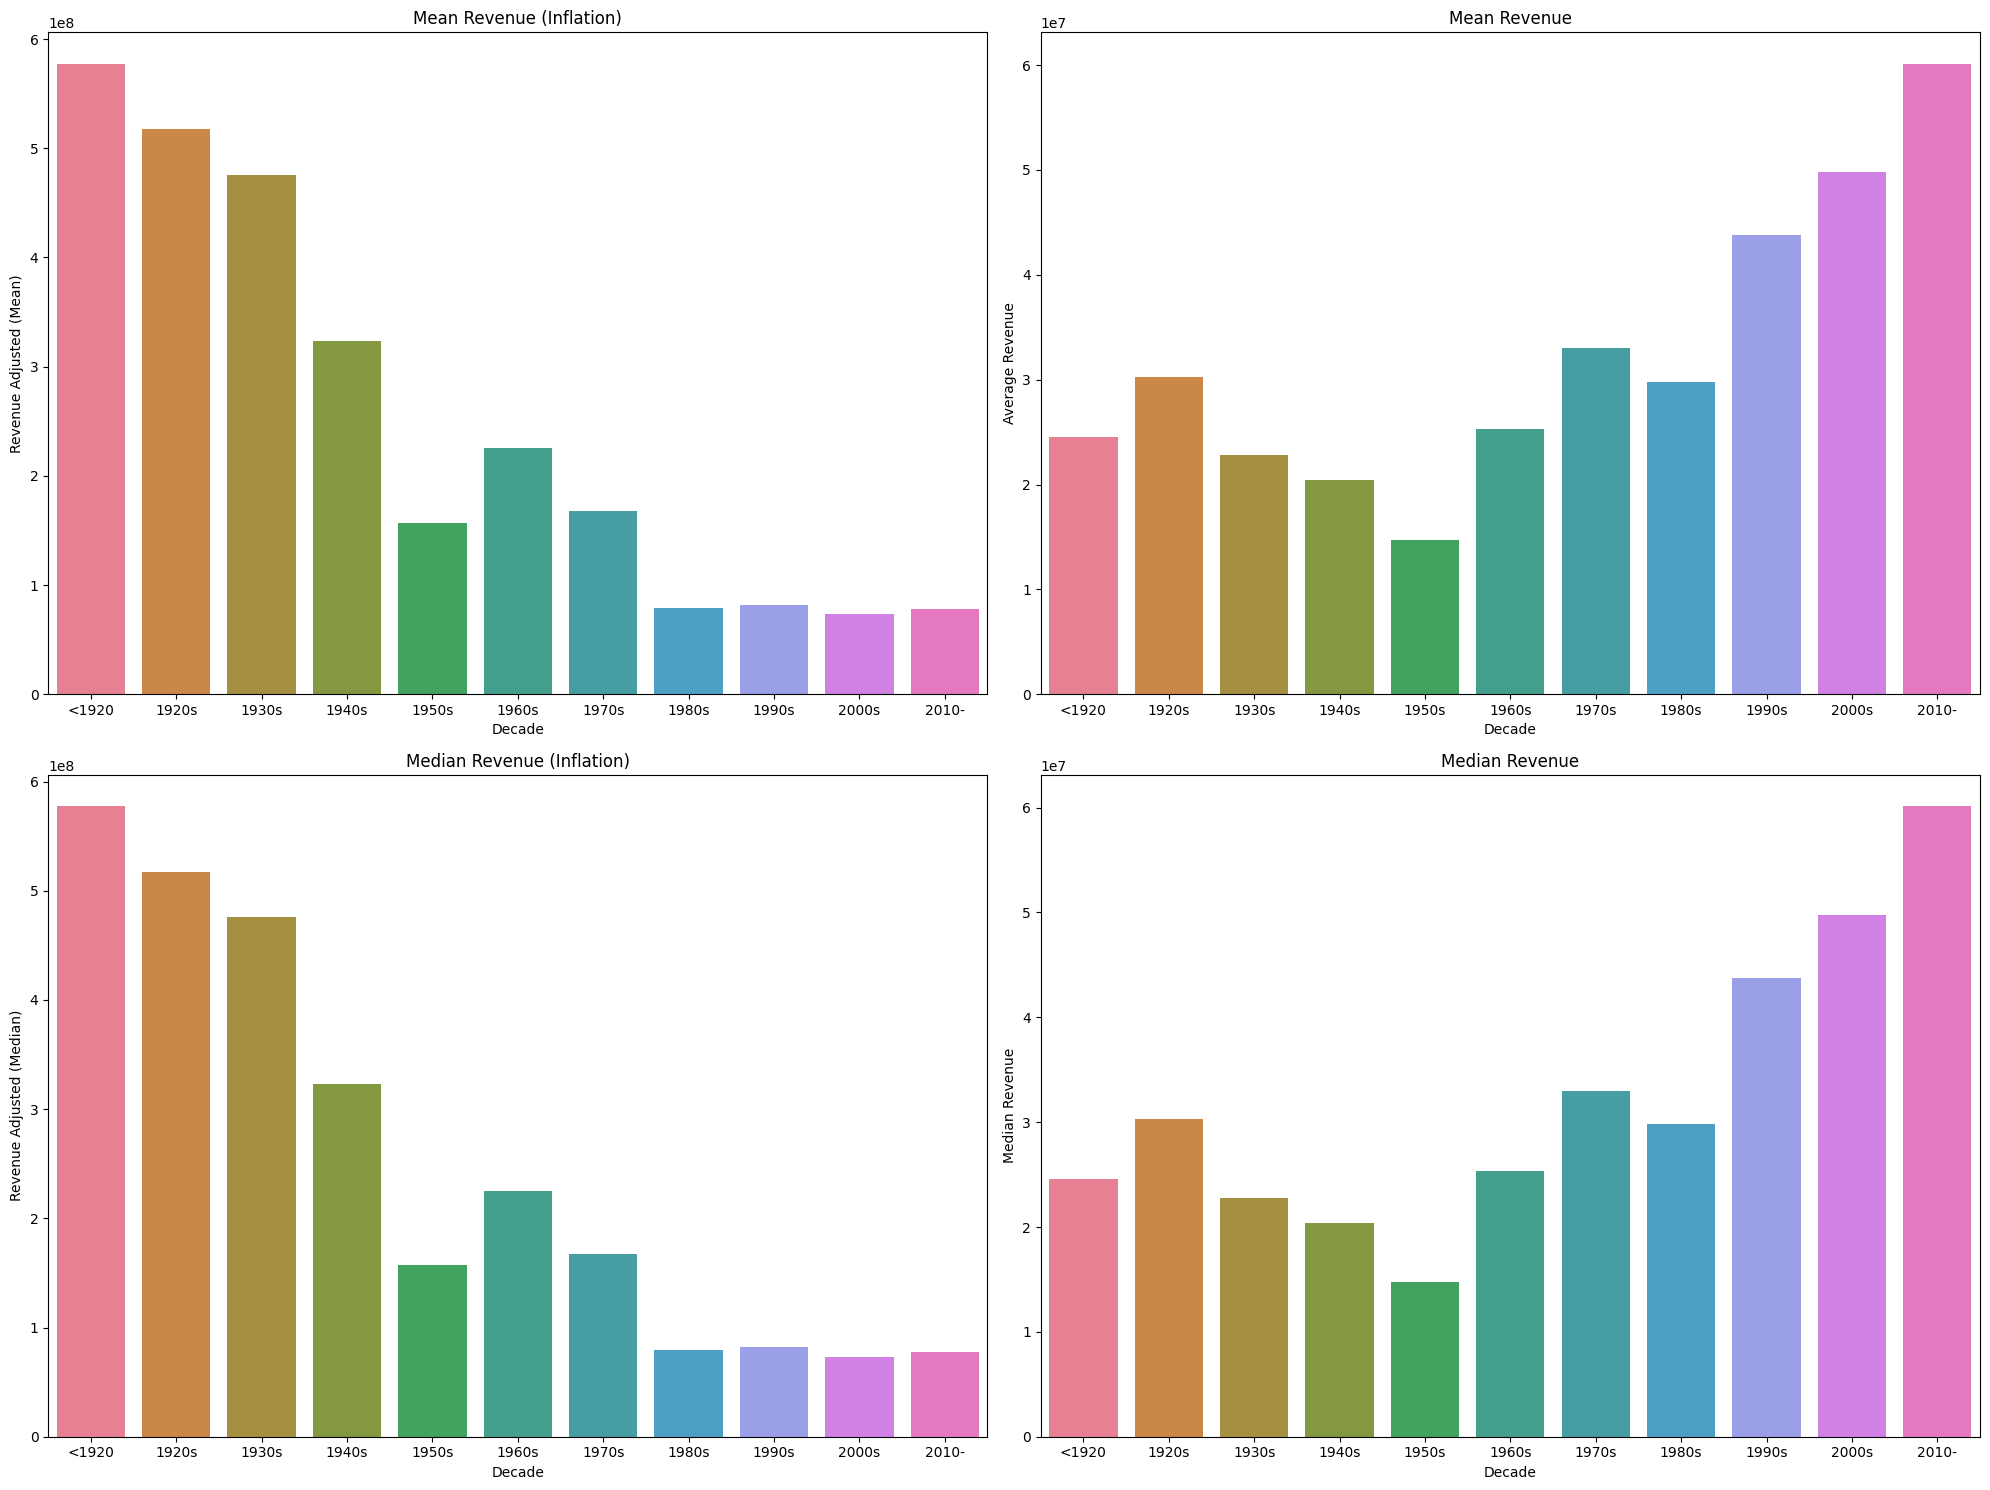

In [386]:
palette_color = sns.color_palette("husl", n_colors=len(Mean_revenues_by_decade_inflation))
# Create a figure and axes with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Flatten the 2D array of axes to a 1D array for easier iteration
axes = axes.flatten()

# Plot Mean Revenue (inflation)
sns.barplot(x='Decade', y='revenue_adjusted', data=Mean_revenues_by_decade_inflation_df, palette=palette_color, ax=axes[0])
axes[0].set_title('Mean Revenue (Inflation)')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Revenue Adjusted (Mean)')

# Plot Mean Revenue
sns.barplot(x='Decade', y='Revenue', data=Mean_revenues_by_decade_df, palette=palette_color, ax=axes[1])
axes[1].set_title('Mean Revenue')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Revenue')

# Plot Median Revenue (inflation)
sns.barplot(x='Decade', y='revenue_adjusted', data=Median_revenues_by_decade_inflation_df, palette=palette_color, ax=axes[2], estimator=pd.Series.median)
axes[2].set_title('Median Revenue (Inflation)')
axes[2].set_xlabel('Decade')
axes[2].set_ylabel('Revenue Adjusted (Median)')

# Plot Median Revenue
sns.barplot(x='Decade', y='Revenue', data=Median_revenues_by_decade_df, palette=palette_color, ax=axes[3], estimator=pd.Series.median)
axes[3].set_title('Median Revenue')
axes[3].set_xlabel('Decade')
axes[3].set_ylabel('Median Revenue')

# Adjustments to the layout
plt.tight_layout()
plt.show()



We could try to see if there is a relationship between runtime and revenue of a movie, so we can try to plot this data (for each specific genre):

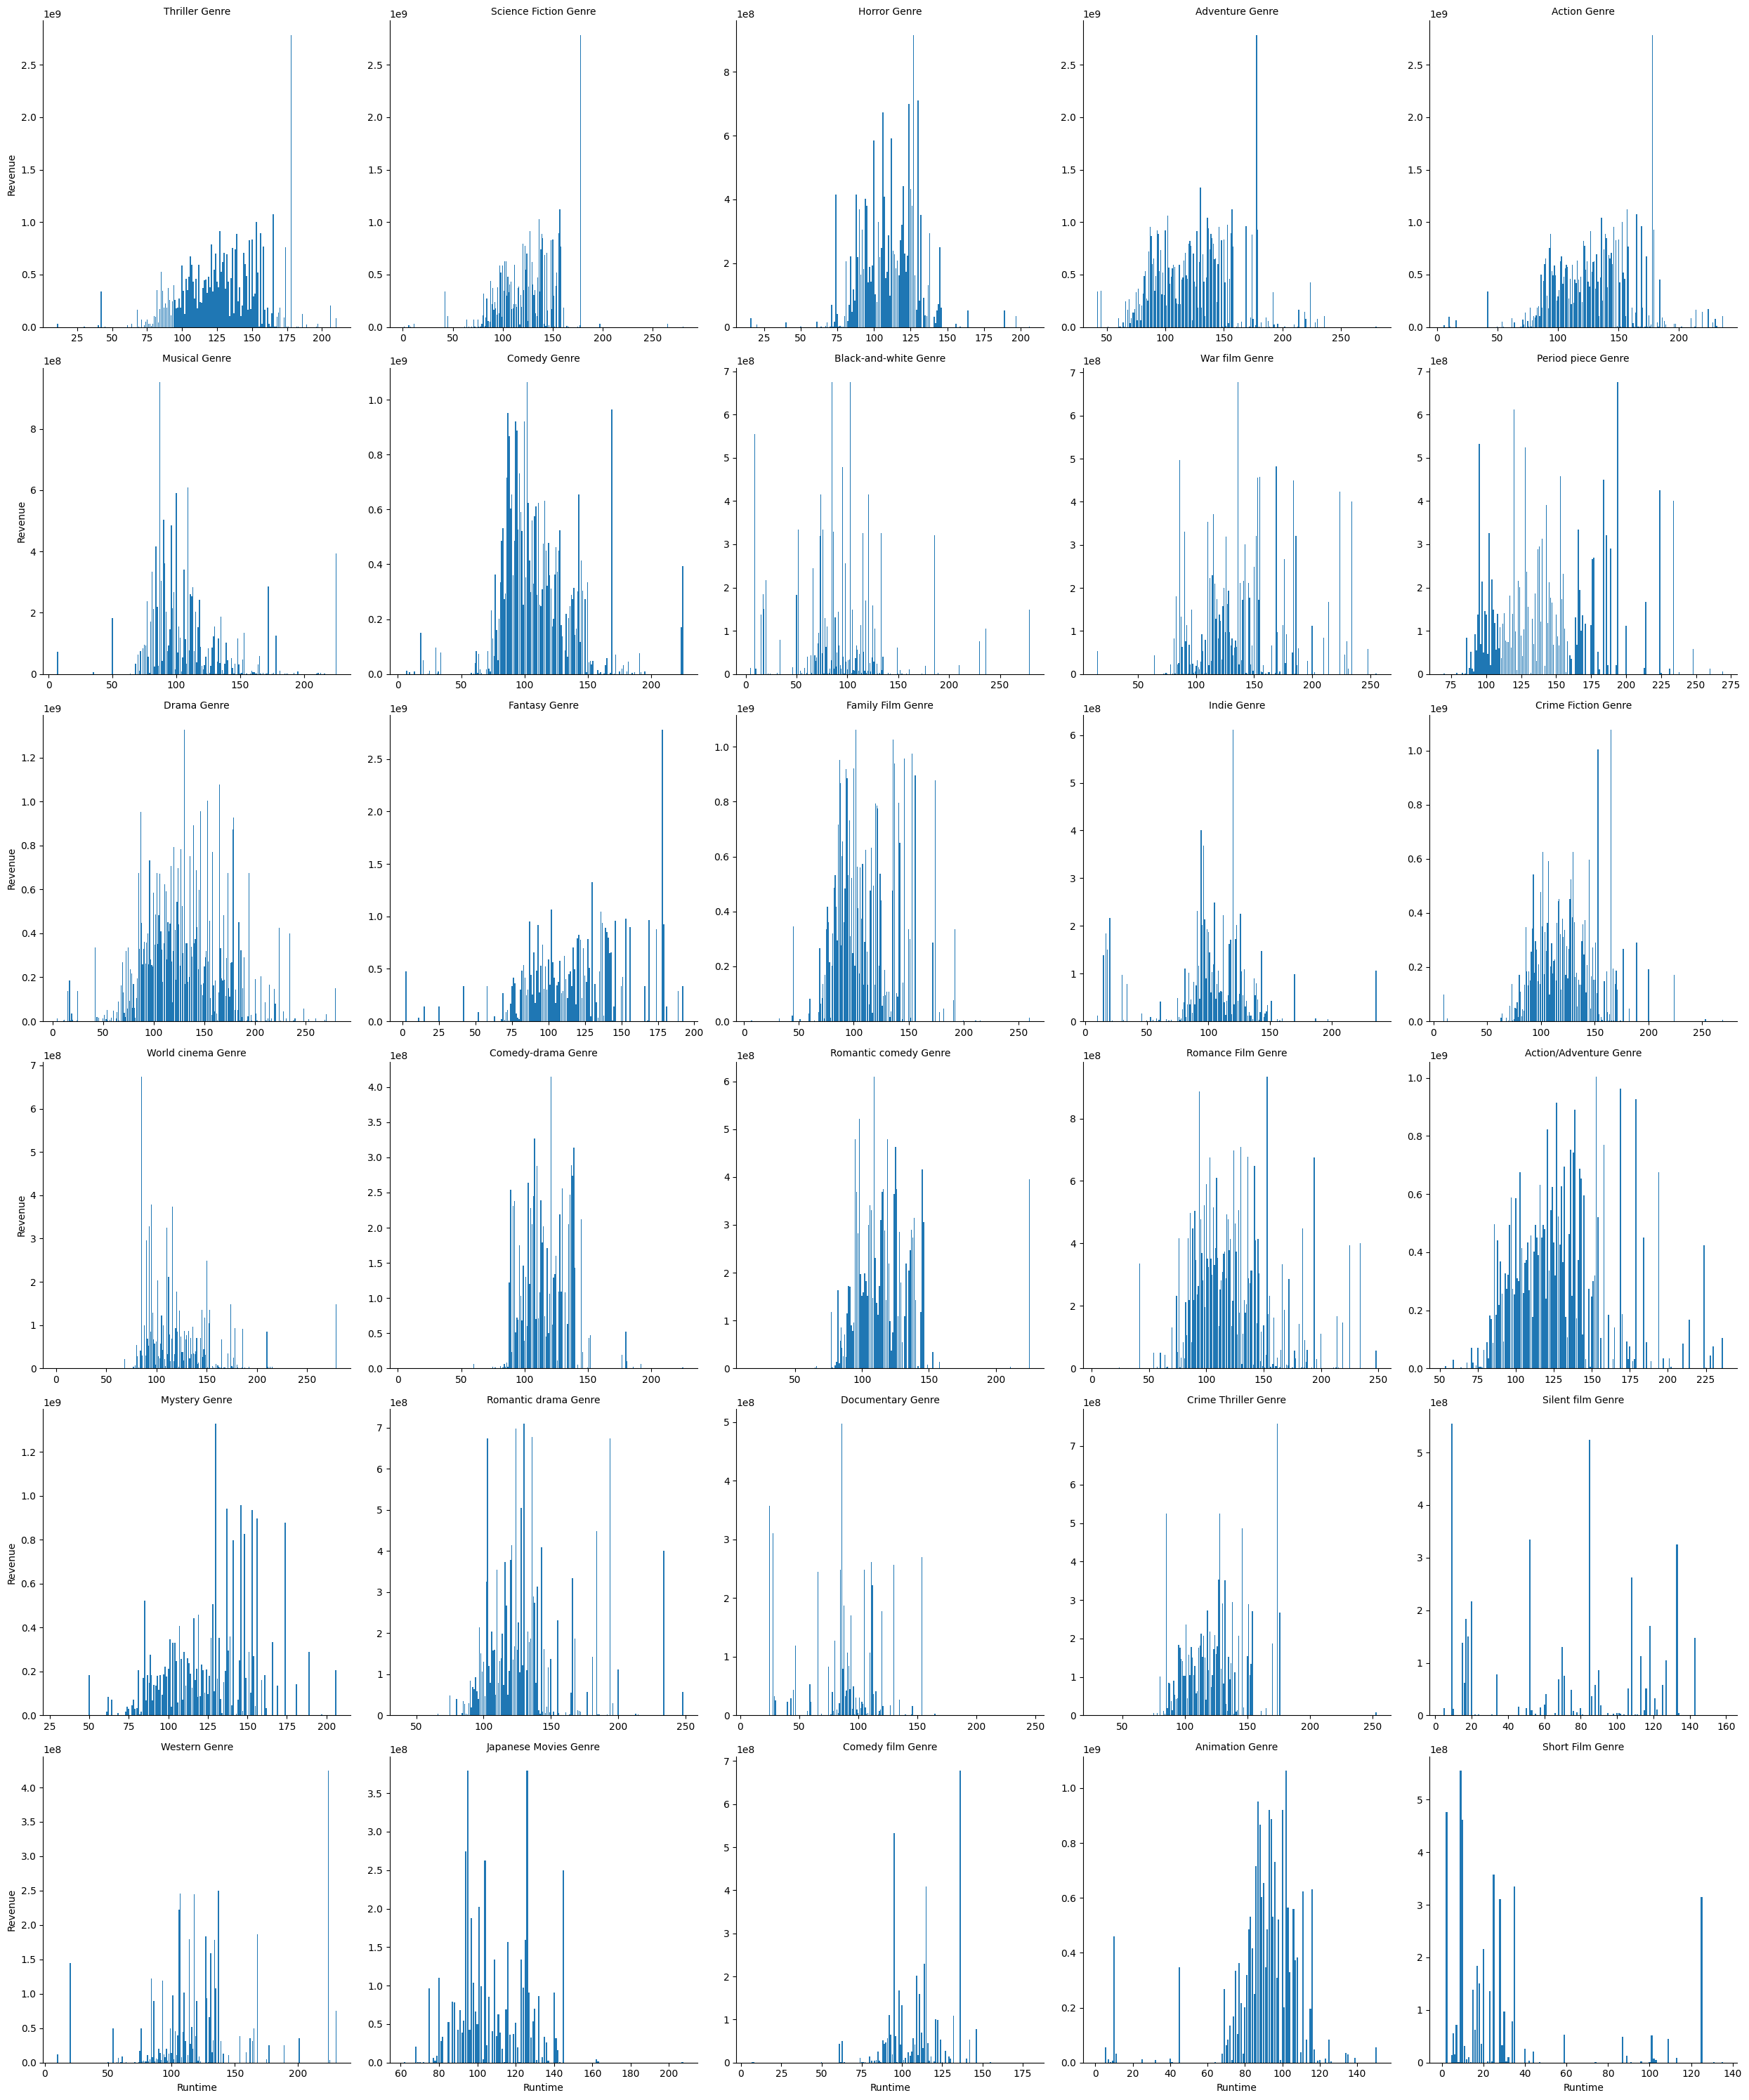

In [387]:
cleaned_movie_data_runtime = cleaned_movie_data.copy()

# drop NaN values for revenues
cleaned_movie_data_runtime = cleaned_movie_data_runtime.dropna(subset=['Revenue'])

# reindex the dataframe
cleaned_movie_data_runtime = cleaned_movie_data_runtime.reset_index(drop=True)

# drop NaN values for runtimes
cleaned_movie_data_runtime = cleaned_movie_data_runtime .dropna(subset=['Runtime'])

# reindex the dataframe
cleaned_movie_data_runtime  = cleaned_movie_data_runtime .reset_index(drop=True)

# drop NaN values for genres
cleaned_movie_data_runtime = cleaned_movie_data_runtime .dropna(subset=['Genres'])

# reindex the dataframe
cleaned_movie_data_runtime  = cleaned_movie_data_runtime .reset_index(drop=True)

# we explode the data to get unique genres
cleaned_movie_data_runtime = cleaned_movie_data_runtime.explode('Genres')

# seaborn grid to display subplots
g = sns.FacetGrid(cleaned_movie_data_runtime, col='Genres', col_wrap=5, height=5, sharex=False, sharey=False)

# add barplots to grid
g.map(plt.bar, 'Runtime', 'Revenue')

g.set_axis_labels('Runtime', 'Revenue')
g.set_titles('{col_name} Genre')

g.tight_layout()
plt.show()

We can also attempt to create a boxplot, highlighting the actor age at movie release, separately for men and women. First, we import the character and movie data, and drop useless columns to facilitate merging:

In [388]:
characters = pd.read_csv("../Clean data/clean_character_data.csv")
characters = characters.drop('Freebase ID', axis=1)
characters = characters.drop('Release date', axis=1)

In [389]:
movies = pd.read_csv('../Clean data/clean_movie_data.csv')
movies = movies.drop('Freebase ID', axis=1)
movies = movies.drop('Release date', axis=1)

We now merge both dataframes to obtain the name of actors alongside the movie they star in, and the age at the release date:

In [390]:
merged = pd.merge(characters, movies, on='Wiki ID')

Some actors contain genders that are neither female nor male, so we can drop them:

In [391]:
good_genders = merged[merged['Actor gender'].isin(['F', 'M'])]
good_genders

,Unnamed: 0_x,Wiki ID,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,...,Unnamed: 0_y,Movie name,Revenue,Runtime,Languages,Countries,Genres,IMDb rating,Wins,Nominations
0,0,975900,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,...,0,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,0.0,2.0
1,1,975900,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,...,0,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,0.0,2.0
2,2,975900,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,...,0,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,0.0,2.0
3,3,975900,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,...,0,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,0.0,2.0
4,4,975900,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,...,0,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91370,450586,24997872,Surya,1982-10-16,M,1.810,/m/0dryh9k,Prithviraj Sukumaran,27.0,/m/0gw0rm2,...,39353,Pokkiri Raja,NaN,136.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}",5.1,1.0,1.0
91371,450587,24997872,Aswathy,1982-09-11,F,1.680,/m/0dryh9k,Shriya Saran,27.0,/m/0gw423l,...,39353,Pokkiri Raja,NaN,136.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}",5.1,1.0,1.0
91372,450630,30553937,Anne Henning,1966-06-14,F,1.650,NaN,Traylor Howard,31.0,/m/0gv_p3v,...,39341,Confessions of a Sexist Pig,NaN,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/01z4y"": ""C...",5.1,4.0,4.0
91373,450631,30553937,Tracy,1967-03-16,F,1.746,/m/033tf_,Lauren Graham,30.0,/m/0gw3h6q,...,39341,Confessions of a Sexist Pig,NaN,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/01z4y"": ""C...",5.1,4.0,4.0


Finally, we create the boxplot:

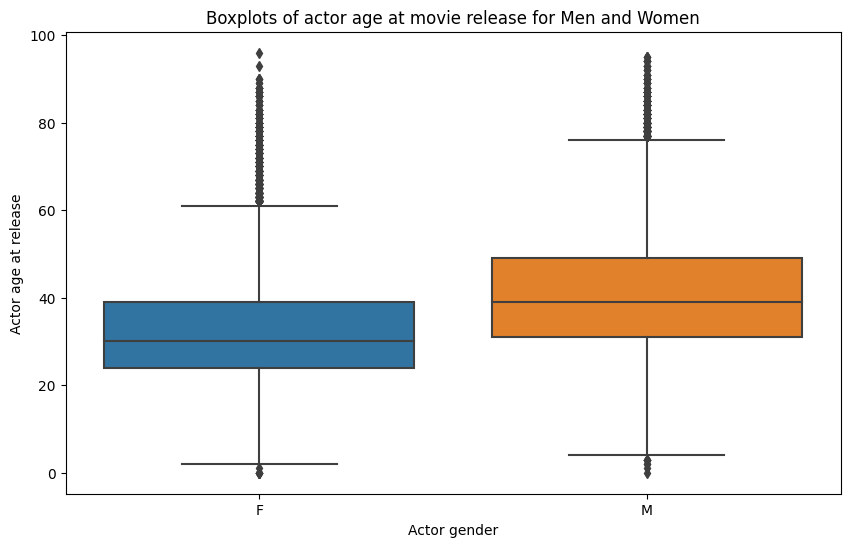

In [392]:
# Create boxplots for men and women
plt.figure(figsize=(10, 6))
sns.boxplot(x='Actor gender', y='Actor age at release', data=good_genders)
plt.title('Boxplots of actor age at movie release for Men and Women')
plt.show()

Here, we notice that women usually feature in movies at a younger age than men do.

### Movies according to geographical location

The goal here is to explore the movie data according to the geographical region. First, we have to split the 'countries' column, because the country names are contained inside of a list.

In [393]:
movie_data = RAW.movie_data.copy()

# count the number of brace objects
count_braces = movie_data[movie_data['Countries'].astype(str).str.contains('{}', na=False)].shape[0]
print(count_braces)

2598


In [394]:
# we select the rows containing empty braces (ie no countries)
rows_to_drop = movie_data[movie_data['Countries'].astype(str).str.contains('{}', na=False)].index

# we then drop these rows
movie_data_empty_dropped = movie_data.drop(index=rows_to_drop)

# reset the indices
movie_data_empty_dropped = movie_data_empty_dropped.reset_index()

After that, we can 'explode' the braces and therefore assign a country to each movie:

In [395]:
movie_data_empty_dropped['Country'] = movie_data_empty_dropped['Countries'].apply(lambda x: re.findall(r'": "(.*?)"', x))

# some duplicates will arise but that is not a problem
movie_data_empty_dropped = movie_data_empty_dropped.explode('Country')
movie_data_empty_dropped = movie_data_empty_dropped.reset_index()

We can now prepare the continent column:

In [396]:
# we use the same method to explode the countries
data_expanded = movie_data_empty_dropped.copy()

# Drop the 'Countries' column
data_expanded = data_expanded.drop(columns='Countries')
data_expanded['Continent']=None

data_expanded

,level_0,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Genres,Country,Continent
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",United States of America,None
1,1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",United States of America,None
2,2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",United States of America,None
3,3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",United States of America,None
4,4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",United States of America,None
...,...,...,...,...,...,...,...,...,...,...,...,...
44011,36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07s9rl0"": ""Drama""}",United States of America,None
44012,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",Ireland,None
44013,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",United Kingdom,None
44014,36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",United States of America,None


Here is a quick test to see how many times the country names appear:

In [397]:
# Display unique strings and their counts in the 'Country' column
string_counts = data_expanded['Country'].value_counts()

# Display the result
print(string_counts)

Country
United States of America    20623
United Kingdom               3352
India                        3298
France                       2295
Japan                        1504
                            ...  
Qatar                           1
Macau                           1
German Language                 1
Uzbek SSR                       1
Haiti                           1
Name: count, Length: 137, dtype: int64


The following function can map the country of the movie to its continent, using a specific library:

In [398]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None
    
for index, country in data_expanded['Country'].items():
    if country_to_continent(country) != None :
        continent = country_to_continent(country)
        data_expanded.at[index, 'Continent'] = continent
    else : 
        data_expanded.at[index,'Continent'] = 'Unknown'
        
data_expanded

,level_0,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Genres,Country,Continent
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",United States of America,North America
1,1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",United States of America,North America
2,2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",United States of America,North America
3,3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",United States of America,North America
4,4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",United States of America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
44011,36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07s9rl0"": ""Drama""}",United States of America,North America
44012,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",Ireland,Europe
44013,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",United Kingdom,Europe
44014,36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",United States of America,North America


This test guarantees that all countries with the continent name 'Africa' are in Africa:

In [399]:
# display the countries where the continent is Africa
african_countries = data_expanded.loc[data_expanded['Continent'] == 'Africa', 'Country']
print(african_countries)

# check that they are indeed African
number_african_countries = data_expanded.loc[data_expanded['Continent'] == 'Africa', 'Country'].value_counts()
print(number_african_countries)

97            Algeria
102      South Africa
539           Morocco
600           Algeria
601           Tunisia
             ...     
42347    South Africa
42945         Morocco
43165    South Africa
43265         Algeria
43835         Algeria
Name: Country, Length: 235, dtype: object
Country
South Africa                        84
Egypt                               48
Morocco                             23
Algeria                             20
Tunisia                             12
Burkina Faso                         7
Mali                                 6
Democratic Republic of the Congo     6
Kenya                                5
Cameroon                             5
Senegal                              5
Nigeria                              4
Libya                                2
Zambia                               2
Ethiopia                             2
Zimbabwe                             2
Congo                                1
Guinea-Bissau                        1
Name: 

Now, let us check the movies which did not get a country or continent:

In [400]:
nan_count = data_expanded['Country'].isna().sum()
unknown_count = (data_expanded['Continent'] == 'Unknown').sum()
# Print the result
print(f"Number of rows where 'country' is NaN: {nan_count}")
print(f"Number of rows where 'continent' is unknown: {unknown_count}")

Number of rows where 'country' is NaN: 0
Number of rows where 'continent' is unknown: 1115


In [401]:
# count the countries with a None value
unknown_countries = data_expanded.loc[data_expanded['Continent'] == 'Unknown', 'Country'].value_counts()

# display
print("Countries whose continent is 'Unknown':")
print(unknown_countries)

Countries whose continent is 'Unknown':
Country
West Germany                                349
Czechoslovakia                              164
Yugoslavia                                  156
Soviet Union                                144
England                                      90
German Democratic Republic                   57
Weimar Republic                              40
Korea                                        22
Scotland                                     19
Burma                                        14
Nazi Germany                                  8
Kingdom of Great Britain                      8
Republic of Macedonia                         7
Socialist Federal Republic of Yugoslavia      7
Serbia and Montenegro                         6
Palestinian territories                       6
Mandatory Palestine                           5
Federal Republic of Yugoslavia                4
Wales                                         3
Soviet occupation zone                  

Let us only keep countries which only have over 100 movies:

In [402]:
# keep countries with over 100 movies
country_counts = data_expanded['Country'].value_counts()

countries_over_100 = country_counts[country_counts >= 100].index.tolist()

# filter to keep rows where the corresponding country is contained in countries_over_100
df_filtered = data_expanded[data_expanded['Country'].isin(countries_over_100) | (data_expanded['Continent'] == 'Africa')]

# display
country_filtered_check = df_filtered['Country'].value_counts()
print(country_filtered_check)

Country
United States of America            20623
United Kingdom                       3352
India                                3298
France                               2295
Japan                                1504
Germany                              1430
Italy                                1344
Canada                               1157
South Korea                           695
Spain                                 539
Australia                             532
Denmark                               474
Sweden                                442
Hong Kong                             437
Netherlands                           424
West Germany                          349
Argentina                             307
China                                 241
Mexico                                210
Norway                                197
Poland                                181
Belgium                               165
Czechoslovakia                        164
Philippines               

Some country names given in the dataset are old, so we have to map them to a continent manually:

In [403]:
# manually-categorised countries
countries_to_modify = ['Hong Kong', 'West Germany', 'Czechoslovakia', 'Soviet Union', 'Yugoslavia']

# dictionary to map countries
correspondances_continents = {
    'Hong Kong': 'Asia',
    'West Germany': 'Europe',
    'Czechoslovakia': 'Europe',
    'Soviet Union': 'Europe',
    'Yugoslavia': 'Europe'
}

# mapping
for co, continent in correspondances_continents.items():
    if co in countries_to_modify:
        df_filtered.loc[df_filtered['Country'] == co, 'Continent'] = continent

We can now check that every country has its continent:

In [404]:
unknown_continent_counts = df_filtered[df_filtered['Continent'] == 'Unknown']['Country'].sum()

# check the number of countries with 'unknown' continents
print("Countries with 'Unknown' in their 'Continent' column:")
print(unknown_continent_counts)

Countries with 'Unknown' in their 'Continent' column:
0


In [405]:
# Filter rows with 'unknown' continent
df_filtered = df_filtered[df_filtered['Continent'] != 'Unknown']

df_filtered

,level_0,index,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Genres,Country,Continent
0,0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",United States of America,North America
1,1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",United States of America,North America
2,2,5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",United States of America,North America
3,3,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",United States of America,North America
4,4,12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",United States of America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
44011,36770,81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07s9rl0"": ""Drama""}",United States of America,North America
44012,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",Ireland,Europe
44013,36771,81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",United Kingdom,Europe
44014,36772,81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",United States of America,North America


We will now group the data by continent in order to save them in separate CSV files:

In [406]:
grouped = df_filtered.groupby('Continent')

# Sauvegarde des données pour chaque continent dans des fichiers CSV séparés
for continent, group_data in grouped:
    file_name = f"{continent}_data.csv"
    group_data.to_csv(file_name, index=False)
    print(f"Données pour {continent} sauvegardées dans '{file_name}'")

Données pour Africa sauvegardées dans 'Africa_data.csv'
Données pour Asia sauvegardées dans 'Asia_data.csv'
Données pour Europe sauvegardées dans 'Europe_data.csv'
Données pour North America sauvegardées dans 'North America_data.csv'
Données pour Oceania sauvegardées dans 'Oceania_data.csv'
Données pour South America sauvegardées dans 'South America_data.csv'


Now, the goal is to make a heatmap to check the collaboration between continents, ie the number of movies having different continents in their countries of production:

In [407]:
# Create a subtable with only Freebase ID and countries

id_country = df_filtered.copy()
id_country = id_country[['Freebase ID', 'Continent']]
#id_country

# We group movies with the same Freebase ID
grouped_continent = id_country.groupby('Freebase ID')['Continent'].agg(list).reset_index()
#grouped_countries['Noms_Pays'].value_counts()

continent_pairs_count = {}

# Iterate over rows and update the dictionary
for _, row in grouped_continent.iterrows():
    continent = row['Continent']
    # Use combinations to get all unique pairs of continent within each 'Freebase ID'
    pairs = list(combinations(continent, 2))
    for pair in pairs:
        continent_pairs_count[pair] = continent_pairs_count.get(pair, 0) + 1
        

# Convert the dictionary to a DataFrame
count_df = pd.DataFrame.from_dict(continent_pairs_count, orient='index', columns=['Count']).reset_index()
array = [np.array([elm[0], elm[1]]) for elm in count_df['index']]
count_df['Continent_1'] = [elm[0] for elm in count_df['index']]
count_df['Continent_2'] = [elm[1] for elm in count_df['index']]

# Creating the pivot table
pivot_table = pd.pivot_table(count_df, values='Count', index='Continent_1', columns='Continent_2', fill_value=0)

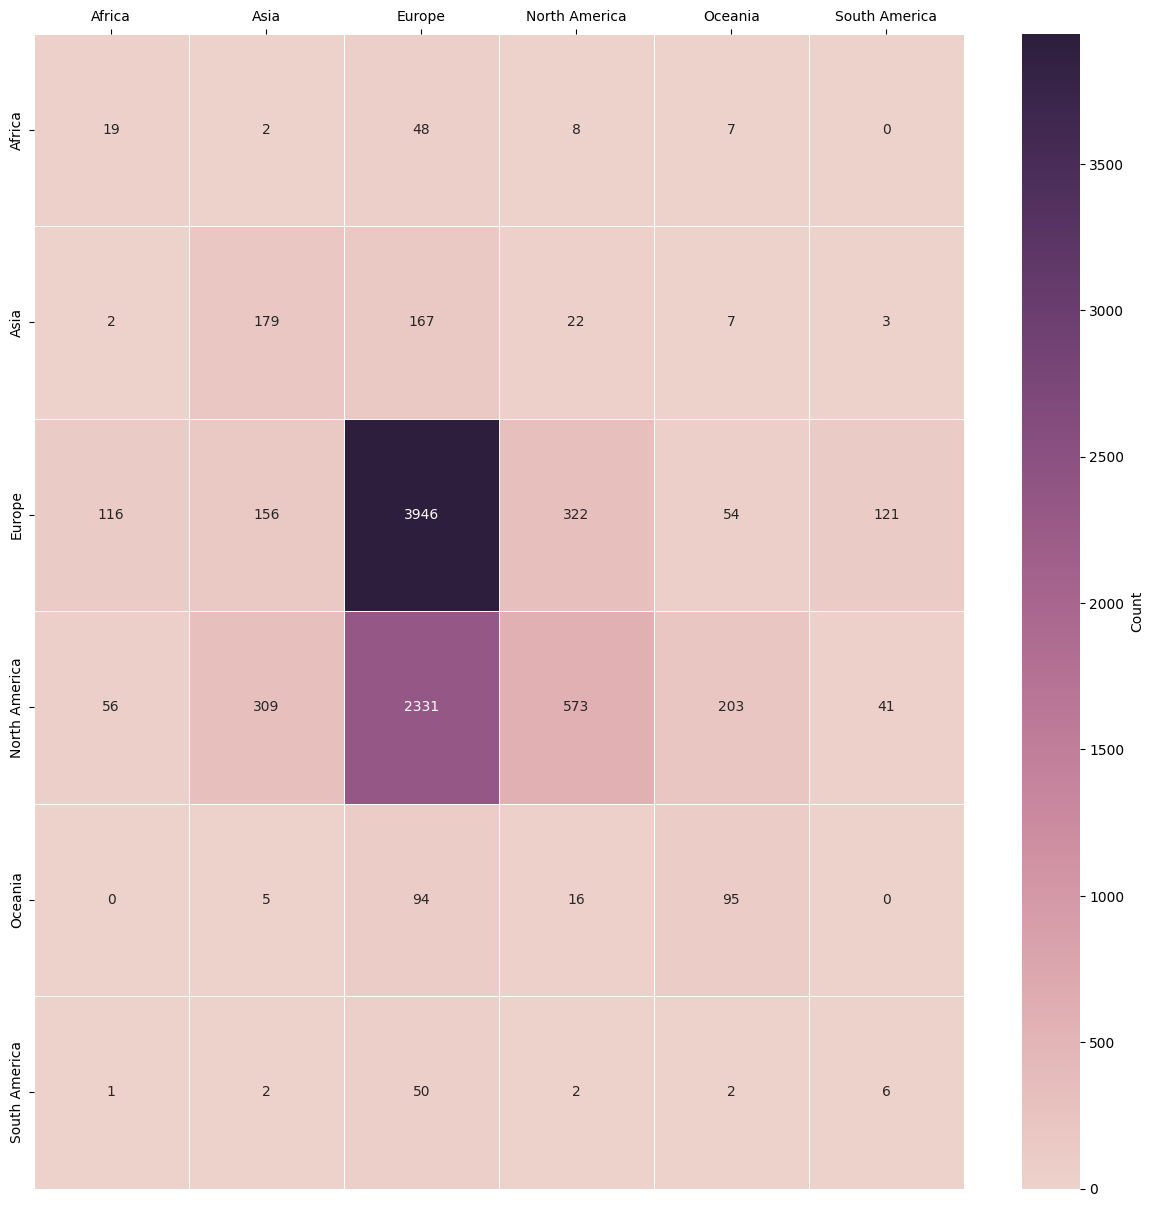

In [408]:
# Heatmap
plt.figure(figsize=(15, 15))
ax = sns.heatmap(pivot_table, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidth= .5, fmt='g', cbar_kws={'label': 'Count'})
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

Here, we see that, if movies contain more than one country of prosuction ,then they are most often both European. There are also a lot of Euro-American movies.

Finally, we can count the number of movies for each continent:

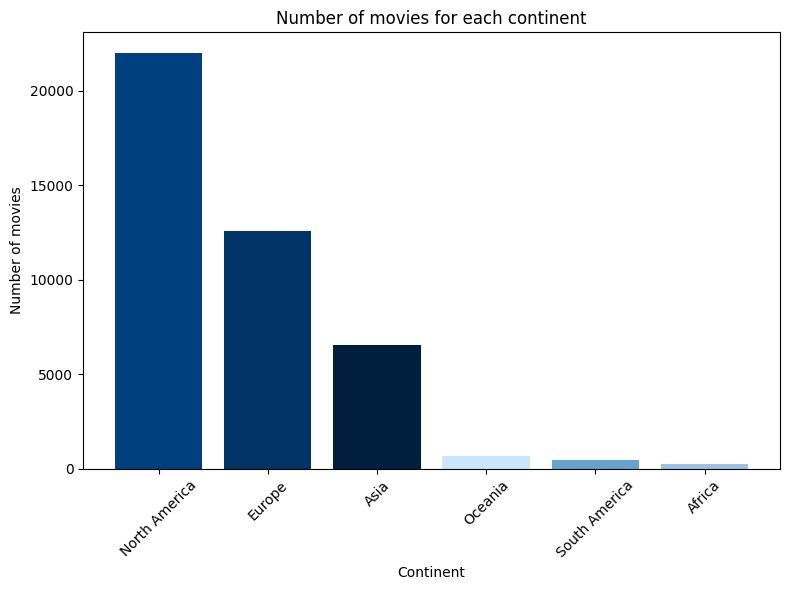

In [409]:
# Count the occurrences of each continent
continent_counts = df_filtered['Continent'].value_counts()

# Define colors for each continent

colors = {
    'Asia': '#001F3F',
    'Europe': '#003366',
    'North America': '#004080',
    'South America': '#66A3CC',
    'Africa' : '#99C2E5',
    'Oceania': '#CCE5FF'
}

plt.figure(figsize=(8, 6))

# Plotting the histogram
plt.bar(continent_counts.index, continent_counts.values, color=[colors.get(cont, 'gray') for cont in continent_counts.index])

plt.title('Number of movies for each continent')
plt.xlabel('Continent')
plt.ylabel('Number of movies')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

We see that the North American film industry dominates in terms of number of movies. It is worth noting that, on average, the Indian film industry (Bollywood) produces more movies than the American (Hollywood) per year, but the dataset provided still features a large bias towards the North American movies.